06/21/2021:  Do ICA fits  across entire wavelength range covered by the components.  Before, I was only fitting to CIV and CIII] on the HST spectrum, but I'm hoping HST+SDSS together might result in better reconstructions.

08/19/2021:  Now that the morphing is working, include that.  Honestly the only other item remaining is the masking, so I should try to work that out as well (maybe in a separate notebook?).

In [2]:
from tensorflow import keras

from astropy.io import fits
from astropy.table import Table
from astropy.io.fits import Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import richardsplot as rplot
import os

In [3]:
!ls

HST_spectra_noBAL.ipynb
HST_spectra_noBAL_ICAonly.ipynb
HST_spectra_noBAL_ICAonly_wMorphing.ipynb
HST_spectra_sdssfits.ipynb
ICAfitting_prelim.ipynb
ICAfitting_wmasks.ipynb


In [4]:
dat = pd.read_csv("../data/HST_Chandra_Redshifts.csv")
dat

Identifier Data_Set         L1550  SDSS  OtherOpt  No_Optical  \
0   002019.22-110609.2      HST  8.850000e+29  True     False       False   
1   082024.21+233450.4      HST  7.830000e+29  True     False       False   
2   082658.85+061142.6      HST  9.610000e+29  True     False       False   
3   083332.92+164411.0      HST  8.290000e+29  True     False       False   
4   083510.36+035901.1      HST  6.300000e+29  True     False       False   
5   085116.14+424328.8      HST  1.030000e+30  True     False       False   
6   091451.42+421957.0      HST  7.440000e+29  True     False       False   
7   093502.52+433110.6      HST  3.890000e+30  True     False       False   
8   100054.96+262242.4      HST  7.170000e+29  True     False       False   
9   103320.65+274024.2      HST  9.280000e+29  True     False       False   
10  111138.66+575030.0      HST  6.790000e+29  True     False       False   
11  111941.12+595108.7      HST  1.130000e+30  True     False       False   
12  112224.15+031802.6      HST  9.280000e+29  True     False       False   
13  112614.93+310146.6      HST  7.050000e+29  True     False       False   
14  113327.78+032719.1      HST  4.580000e+29  True     False       False   
15  113923.66+002301.6      HST  1.490000e+30  True     False       False   
16  123734.47+444731.7      HST  1.190000e+30  True     False       False   
17  125415.55+480850.6      HST  8.420000e+29  True     False       False   
18  131627.84+315825.7      HST  6.400000e+29  True     False       False   
19  134701.54+215401.1      HST  1.160000e+30  True     False       False   
20  140331.29+462804.8      HST  6.370000e+29  True     False       False   
21  145334.13+311401.4      HST  6.290000e+29  True     False       False   
22  152654.61+565512.3      HST  3.670000e+29  True     False       False   
23  155837.77+081345.8      HST  9.040000e+29  True     False       False   
24  234145.51-004640.5      HST  9.500000e+29  True     False       False   

      Best_z Ref_z                     SDSS_filename  
0   0.492049  HW10  spSpec-52145-0653-300_skysub.fit  
1   0.470576  HW10  spSpec-53317-1926-378_skysub.fit  
2   0.495792  HW10    spSpec-52738-1296-050_comb.fit  
3   0.460528  HW10  spSpec-53712-2276-508_skysub.fit  
4   0.492039  HW10  spSpec-52646-1186-098_skysub.fit  
5   0.482517  HW10  spSpec-52592-0896-063_skysub.fit  
6   0.549563  HW10  spSpec-52674-1201-225_skysub.fit  
7   0.458625  HW10    spSpec-52325-0870-080_comb.fit  
8   0.505782  HW10  spSpec-53740-2344-538_skysub.fit  
9   0.535694  HW10  spSpec-53794-2353-600_skysub.fit  
10  0.465551  HW10  spSpec-52378-0950-014_skysub.fit  
11  0.488555  HW10  spSpec-52398-0951-446_skysub.fit  
12  0.475291  HW10  spSpec-52636-0511-567_skysub.fit  
13  0.495416  HW10  spSpec-53431-1979-007_skysub.fit  
14  0.524458  HW10  spSpec-51989-0513-340_skysub.fit  
15  0.471928  HW10    spSpec-51584-0283-322_comb.fit  
16  0.461260  HW10  spSpec-53062-1372-488_skysub.fit  
17  0.502680  HW10  spSpec-53116-1457-421_skysub.fit  
18  0.463783  HW10  spSpec-53852-2104-417_skysub.fit  
19  0.502083  HW10  spSpec-54527-2769-354_skysub.fit  
20  0.459070  HW10  spSpec-52723-1285-014_skysub.fit  
21  0.464529  HW10  spSpec-53816-1843-502_skysub.fit  
22  0.481869  HW10    spSpec-53437-0614-452_comb.fit  
23  0.517017  HW10  spSpec-53228-1728-218_skysub.fit  
24  0.524498  HW10    spSpec-51783-0385-126_comb.fit

In [5]:
! ls ../data/

HST_Chandra_Redshifts.csv HST_SDSS_Data


In [6]:
path = "../data/HST_SDSS_Data/"

In [7]:
for spec in np.sort([f for f in os.listdir(path) if not f.startswith(".")]):
        hdul_spec = fits.open(path+spec)
        z      = dat["Best_z"][dat["Identifier"]==spec[5:23]].values
        wav   = hdul_spec[1].data["Wavelength"]# / (1+z)
        print(min(wav), min(wav/(1+z)), max(wav), max(wav/(1+z)), z)

1663.0296795457843 1114.594547193681 9249.111180798143 6198.932595912161 [0.492049]
1664.1788566165847 1131.6510378359123 9223.59021691579 6272.093531320918 [0.470576]
1664.1788566165847 1112.5737111955302 9215.09888738286 6160.6820248957465 [0.495792]
1663.4126503701698 1138.9118526794211 9249.111180798134 6332.717469845244 [0.460528]
1663.7957093870014 1115.1154288775301 9223.5902169158 6181.869386065511 [0.492039]
1663.7957093870014 1122.2776598089608 9223.5902169158 6221.574671262319 [0.482517]
1663.7957093870014 1073.719306273447 9223.5902169158 5952.38155332555 [0.549563]
1666.86335888775 1142.7634648300625 9217.22098662202 6319.1162818558705 [0.458625]
1663.4126503701698 1104.6835799406354 9223.5902169158 6125.448582142568 [0.505782]
1664.1788566165847 1083.6656629618822 9223.59021691579 6006.1380827923995 [0.535694]
1664.9454157952753 1136.0542320228196 9223.590216915782 6293.598937816412 [0.465551]
1664.5620920792376 1118.2402343744352 9223.59021691579 6196.338205115559 [0.488

So each spectrum has different *observed* wavelength coverage.  Easiest way to deal with the is probably to just get ride of Ly$\alpha$.  Can go from 1260-1940 Å for the autoencoder to get a equal part of the spectrum for each object.

[0.492049] 002019.22-110609.2
1114.594547193681 6198.932595912161


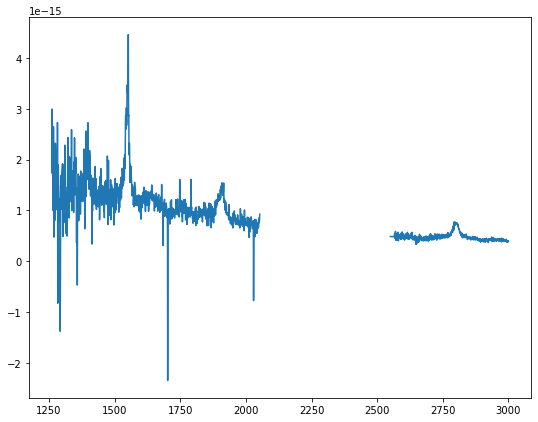

[0.470576] 082024.21+233450.4
1131.6510378359123 6272.093531320918


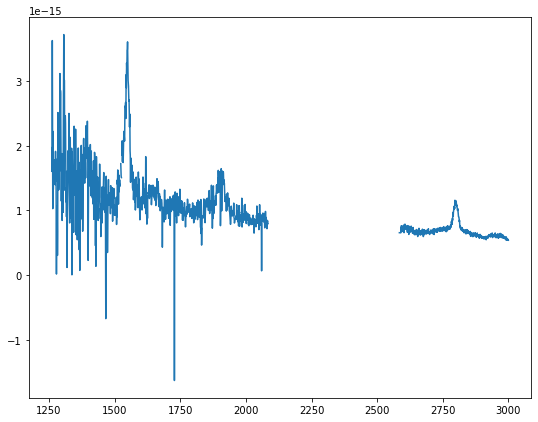

[0.495792] 082658.85+061142.6
1112.5737111955302 6160.6820248957465


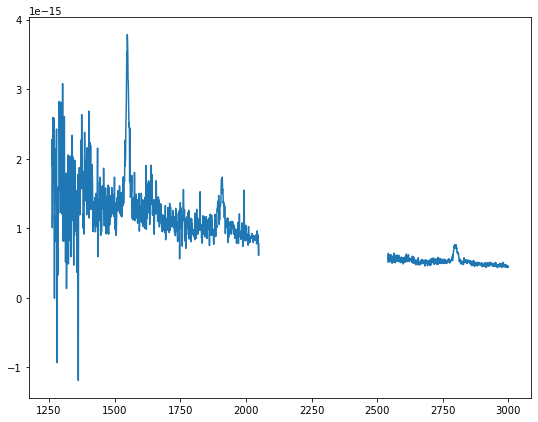

[0.460528] 083332.92+164411.0
1138.9118526794211 6332.717469845244


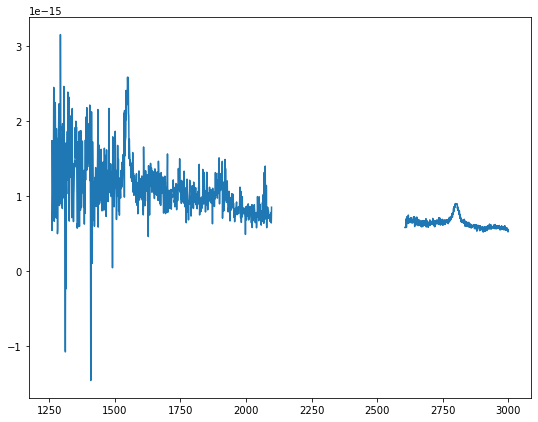

[0.492039] 083510.36+035901.1
1115.1154288775301 6181.869386065511


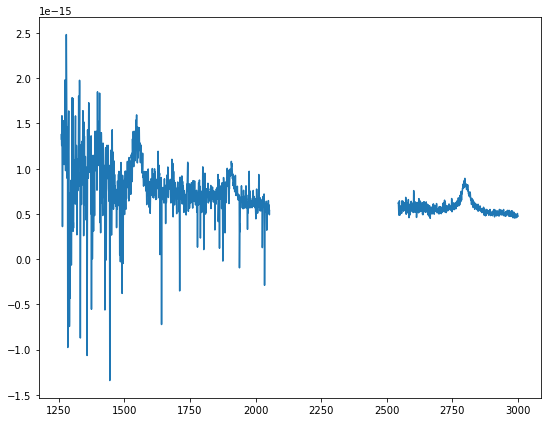

[0.482517] 085116.14+424328.8
1122.2776598089608 6221.574671262319


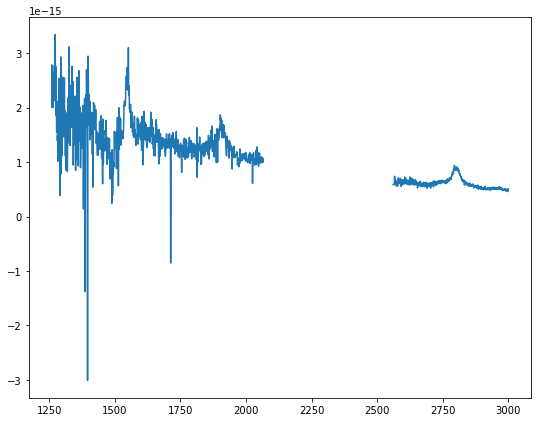

[0.549563] 091451.42+421957.0
1073.719306273447 5952.38155332555


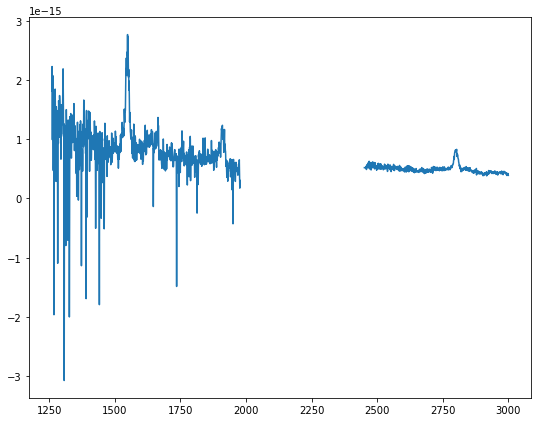

[0.458625] 093502.52+433110.6
1142.7634648300625 6319.1162818558705


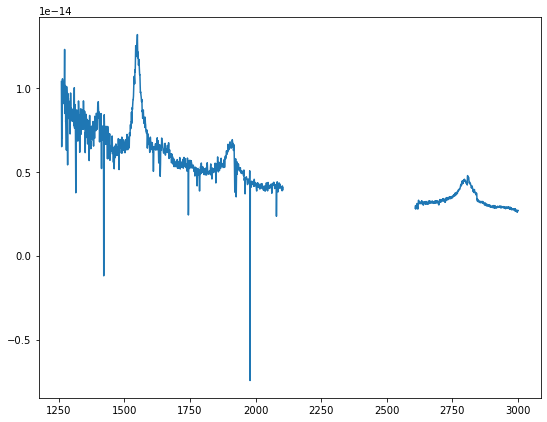

[0.505782] 100054.96+262242.4
1104.6835799406354 6125.448582142568


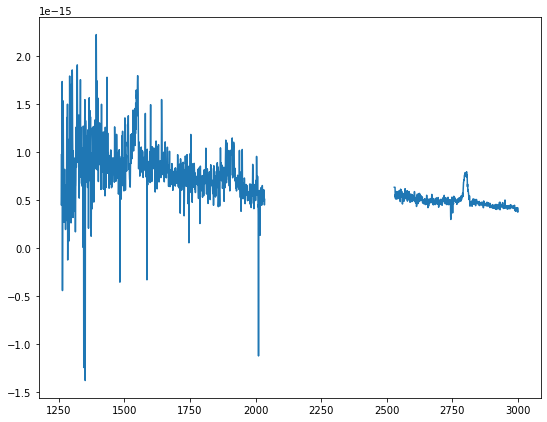

[0.535694] 103320.65+274024.2
1083.6656629618822 6006.1380827923995


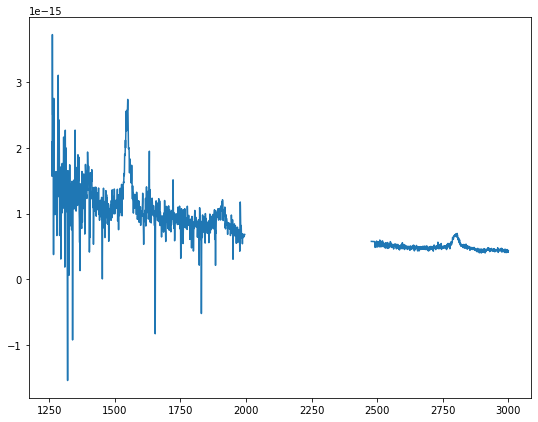

[0.465551] 111138.66+575030.0
1136.0542320228196 6293.598937816412


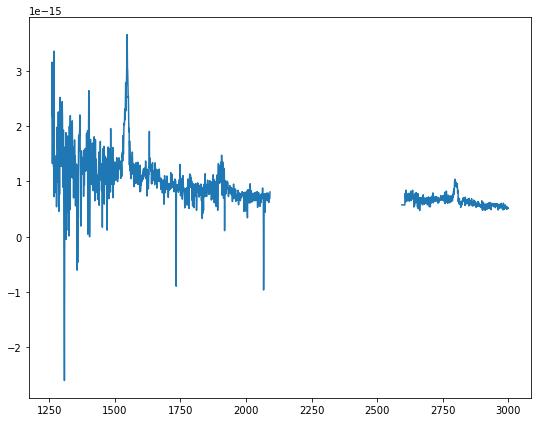

[0.488555] 111941.12+595108.7
1118.2402343744352 6196.338205115559


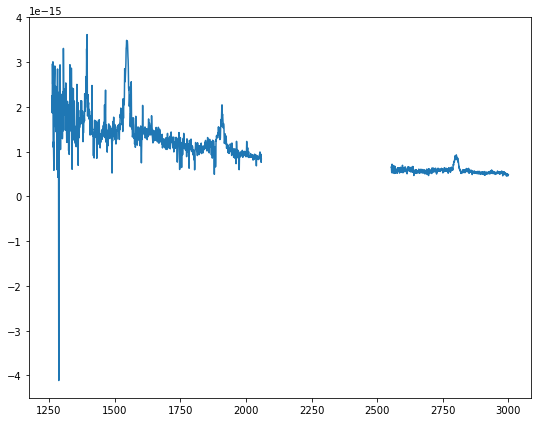

[0.475291] 112224.15+031802.6
1128.2940735619195 6252.04804809071


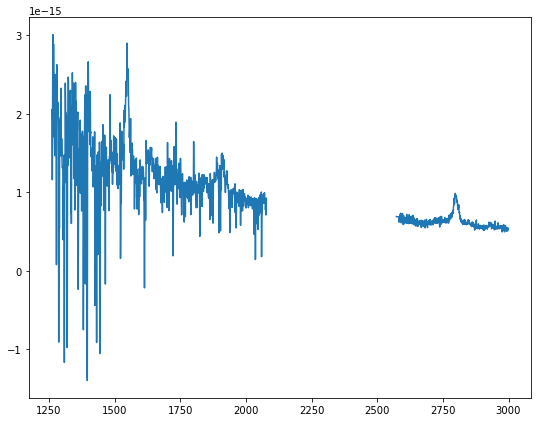

[0.495416] 112614.93+310146.6
1112.5972367468326 6167.909275356021


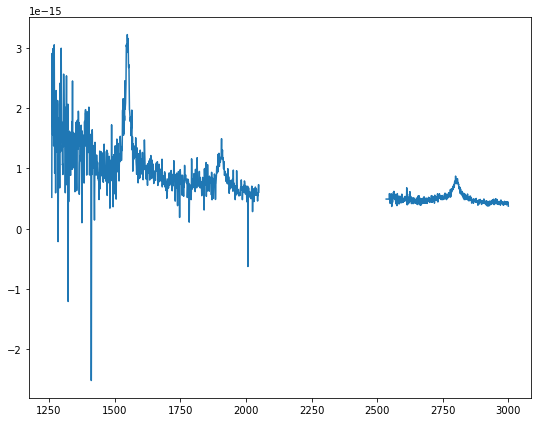

[0.524458] 113327.78+032719.1
1090.8989815041045 6050.406253839601


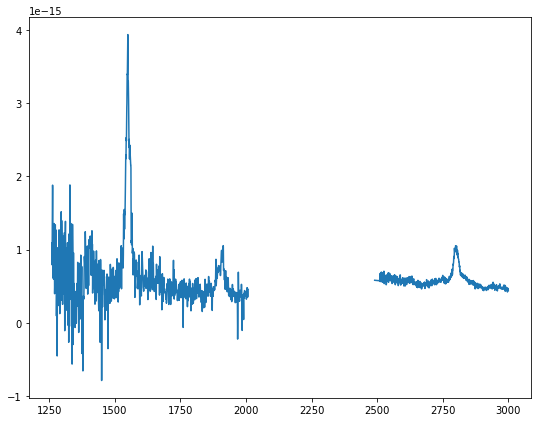

[0.471928] 113923.66+002301.6
1130.6115901162182 6262.005333563902


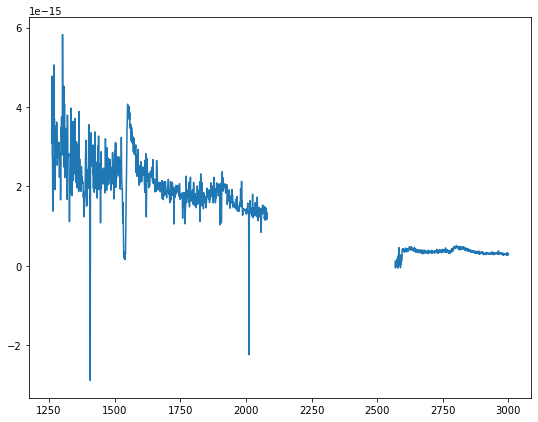

[0.46126] 123734.47+444731.7
1138.6034719262836 6309.173983102878


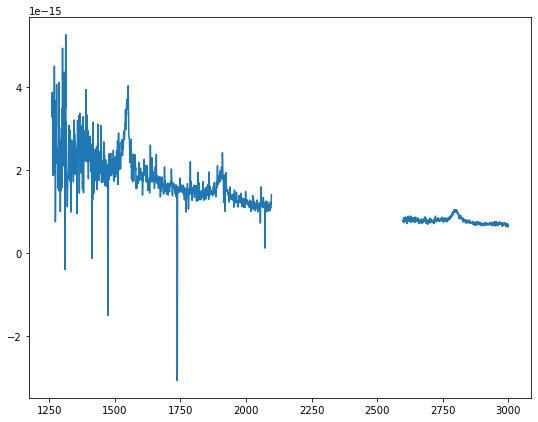

[0.50268] 125415.55+480850.6
1107.4738844042542 6138.093417704229


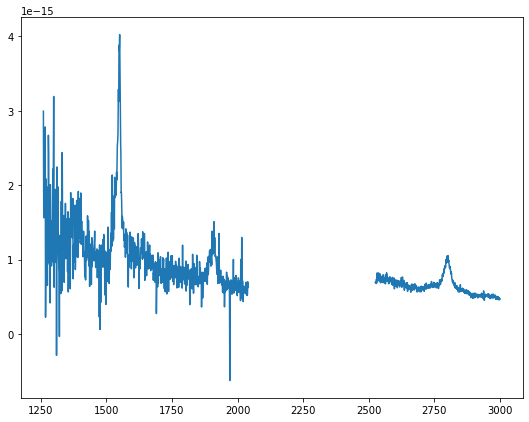

[0.463783] 131627.84+315825.7
1136.6409566083232 6301.2005310321265


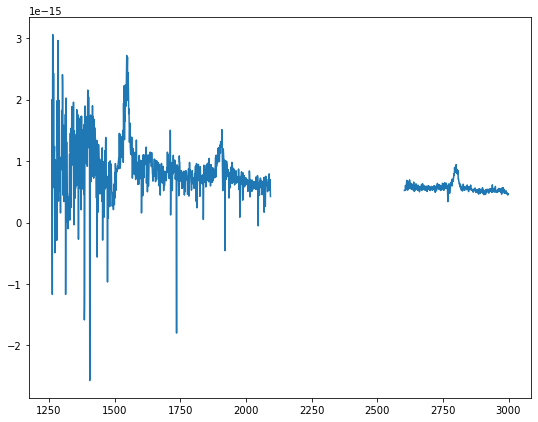

[0.502083] 134701.54+215401.1
1107.6589705009653 6137.70582221416


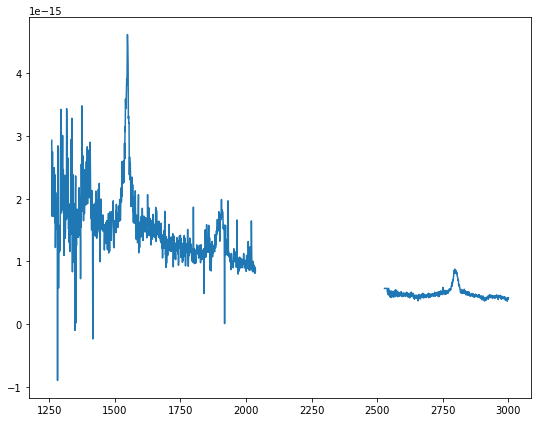

[0.45907] 140331.29+462804.8
1140.5750626197403 6321.554289318395


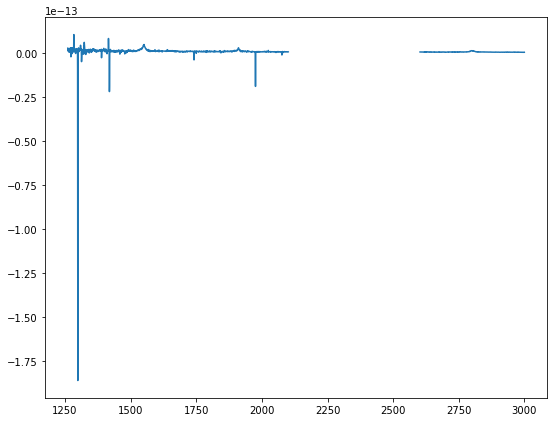

[0.464529] 145334.13+311401.4
1136.585272179136 6297.990833172843


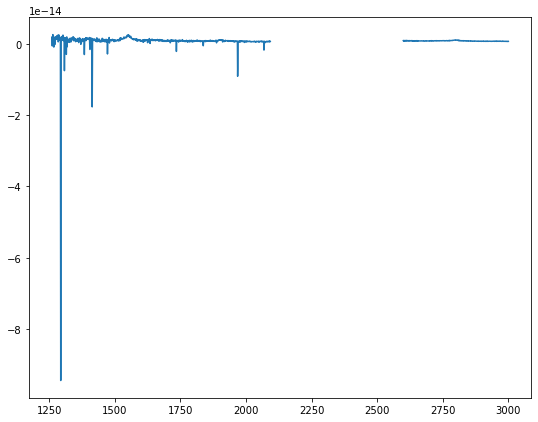

[0.481869] 152654.61+565512.3
1123.0269724358798 6217.133415112151


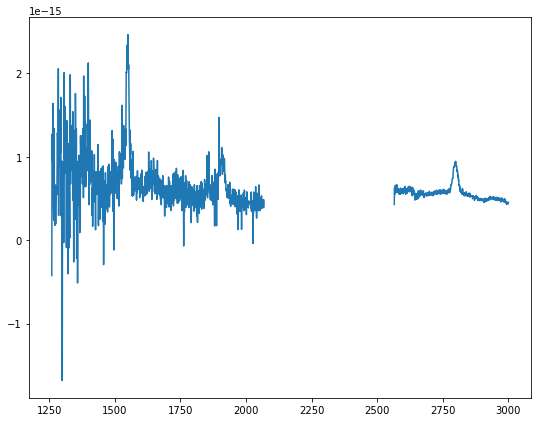

[0.517017] 155837.77+081345.8
1097.0073879307777 6080.083622606596


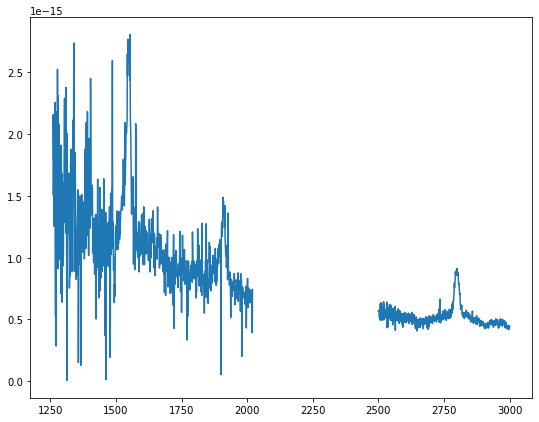

[0.524498] 234145.51-004640.5
1091.1215694413308 6039.112793229609


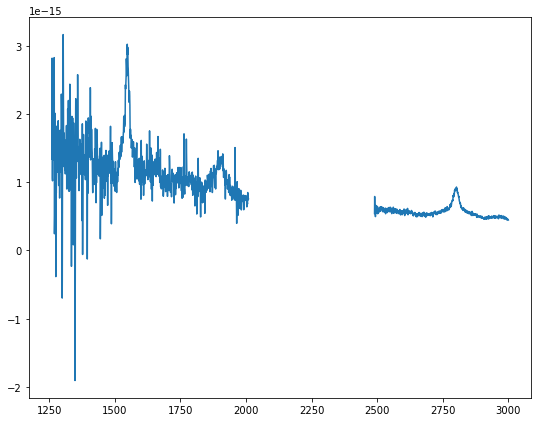

In [8]:
hst = []
wavelist= []
ivar= []
masks   = []

for spec in np.sort([f for f in os.listdir(path) if not f.startswith(".")]):
        z      = dat["Best_z"][dat["Identifier"]==spec[5:23]].values
        print(z, spec[5:23])
        hdul_spec = fits.open(path+spec)
        flux   = hdul_spec[1].data["Flux"]
        wav   = hdul_spec[1].data["Wavelength"] / (1+z)
        err    = hdul_spec[1].data["Flux Errors"]
        specmask   = hdul_spec[1].data["Masks"]
        hdul_spec.close()
        print(min(wav), max(wav))
        wavemask = (wav>=1260)&(wav<=3000)

        fig = plt.figure(figsize=(9,7))
        plt.plot(wav[wavemask], flux[wavemask])
        plt.show()

        #if len(hst)==0:
        hst.append(flux[wavemask][:3767]) #size is either 3767 or 3768
        wavelist.append(wav[wavemask][:3767])
        ivar.append(err[wavemask][:3767])
        masks.append(specmask[wavemask][:3767])
        
hst = np.array(hst)
wavelist = np.array(wavelist)
ivar = np.array(ivar)
masks = np.array(masks)

In [21]:
ivar

array([[2.51523623e-15, 2.94588473e-15, 3.32093304e-15, ...,
        1.79370526e-17, 1.79105084e-17, 1.85888047e-17],
       [2.65900390e-15, 2.75977482e-15, 3.02214070e-15, ...,
        1.74006227e-17, 1.74144415e-17, 1.74674158e-17],
       [2.90675625e-15, 2.73754006e-15, 2.47908778e-15, ...,
        1.60144367e-17, 1.61324323e-17, 1.60904629e-17],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.20270084e-17, 1.19236530e-17, 1.17859804e-17],
       [1.99948323e-15, 1.97376702e-15, 1.94774249e-15, ...,
        1.76733060e-17, 1.73422783e-17, 1.72754851e-17],
       [2.89182959e-15, 3.10289581e-15, 2.73345678e-15, ...,
        1.03605356e-17, 1.03588076e-17, 1.03249164e-17]])

---

## ICA fitting

In [9]:
#Use the package that Amy used for determining weights
from lmfit import minimize, Parameters

In [11]:
#Load in ICA components and save in Dataframe
cmod = pd.read_csv("/Users/trevormccaffrey/Desktop/Research/GTR/Cosmo/ML/ICAcomponents_amy/amy_12603000_10c_180421.comp", sep="\s+", 
                    names=["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10"])

clow = pd.read_csv("/Users/trevormccaffrey/Desktop/Research/GTR/Cosmo/ML/ICAcomponents_amy/amy_12753000_lowew_10c_181101_v1.comp", sep="\s+", 
                    names=["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10"])

chigh = pd.read_csv("/Users/trevormccaffrey/Desktop/Research/GTR/Cosmo/ML/ICAcomponents_amy/amy_12653000_hew_hsn_7c_190302.comp", sep="\s+", 
                    names=["c1","c2","c3","c4","c5","c6","c7"])

cmod.head()

c1         c2        c3         c4         c5         c6         c7  \
0  24.698806  16.686412  7.688548  15.341052  23.578585  26.683294  13.495317   
1  24.739279  16.817581  7.595197  15.180562  23.401660  26.911398  13.390482   
2  24.224352  17.866104  6.588490  14.184640  20.963588  31.500265  13.759934   
3  23.490432  19.006920  5.655106  13.356560  18.174907  36.655364  14.089166   
4  22.691346  20.734796  4.060175  11.884361  14.053418  44.351801  14.582722   

         c8        c9       c10  
0  6.538646  1.664259  2.183455  
1  6.503097  1.688669  2.158522  
2  6.013081  2.042107  2.182271  
3  5.374100  2.372019  2.262592  
4  4.537810  2.668855  2.364192

In [256]:
#Load in wave arrays for each set of components
wave_mod = np.array(pd.read_csv("/Users/trevormccaffrey/Desktop/Research/GTR/Cosmo/ML/ICAcomponents_amy/wav_12603000.dat", names=["wave"])).flatten()
wave_low = np.array(pd.read_csv("/Users/trevormccaffrey/Desktop/Research/GTR/Cosmo/ML/ICAcomponents_amy/wav_12753000.dat", names=["wave"])).flatten()
wave_high= np.array(pd.read_csv("/Users/trevormccaffrey/Desktop/Research/GTR/Cosmo/ML/ICAcomponents_amy/wav_12653000.dat", names=["wave"])).flatten()

In [228]:
wave_high.shape

(3750,)

modmask = np.array(((wave_mod>1145))).flatten()
lowmask = np.array(((wave_low>1145))).flatten()
highmask= np.array(((wave_high>1145))).flatten()

wave_mod = np.array(wave_mod[modmask]).flatten()
wave_low = np.array(wave_low[lowmask]).flatten()
wave_high= np.array(wave_high[highmask]).flatten()

In [257]:
#make an array of the components to feed to minimize
components_mod = np.array([])
components_low = np.array([])
components_high= np.array([])

for n,i in enumerate(cmod):
    if n==0:
        components_mod = np.append(components_mod, cmod[[i]].values.flatten().astype(float))
        components_low = np.append(components_low, clow[[i]].values.flatten().astype(float))
        components_high= np.append(components_high, chigh[[i]].values.flatten().astype(float))
    elif n < 7:
        components_mod = np.vstack((components_mod, cmod[[i]].values.flatten().astype(float)))
        components_low = np.vstack((components_low, clow[[i]].values.flatten().astype(float)))
        components_high= np.vstack((components_high, chigh[[i]].values.flatten().astype(float)))
    else:
        components_mod = np.vstack((components_mod, cmod[[i]].values.flatten().astype(float)))
        components_low = np.vstack((components_low, clow[[i]].values.flatten().astype(float)))

In [258]:
components_low.shape

(10, 3716)

In [259]:
components_mod.shape, components_low.shape, components_high.shape

((10, 3768), (10, 3716), (7, 3751))

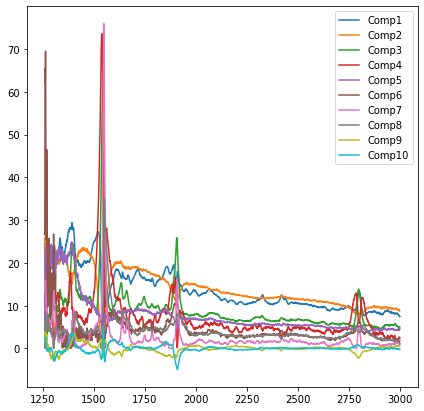

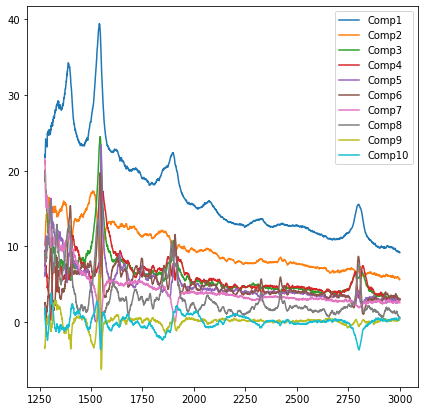

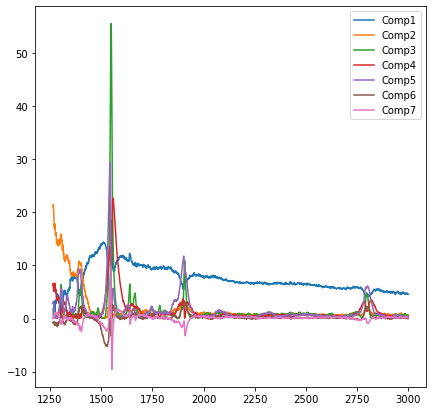

In [232]:
for waves,comps in zip([wave_mod, wave_low, wave_high], [components_mod, components_low, components_high]):
    fig = plt.figure(figsize=(7,7))
    for i in range(comps.shape[0]):
        plt.plot(waves, comps[i,:], label="Comp%d"%(i+1))
    plt.legend(loc="best")
    plt.show()

In [282]:
a = np.array([1,2,3])

In [284]:
np.array??

In [285]:
def mask(components, wave, spectrum, ivar, flags):
    #The mask is just the pixels that the reconstruction should ignore
    mask = np.zeros(len(spectrum))
    
    #Flag bad pixels from Angelica
    mask[(flags!=0)] = 1

    SiIV  = np.array(((wave>1295) & (wave<1400))).flatten()
    CIV   = np.array(((wave>1490) & (wave<1516))).flatten()
    AiIII = np.array(((wave>1780) & (wave<1880))).flatten()

    mask[CIV] = 1
    mask[AiIII] = 1
    mask[SiIV] = 1
    mask = mask!=1

    #Now run ICA on only the unmasked part of the spectrum
    print(components.shape[1])
    try:
        fit = ica_fit(components[:,mask], spectrum[mask], ivar[mask])
    except IndexError:
        #For low/high EW, there's a one-pixel difference between mask arrays
        mask = np.append(mask, 0)
        fit = ica_fit(components[:,mask], spectrum[mask], ivar[mask])
        mask = mask[:-1]
        
    
    weights = []
    for i in fit.params: weights.append(fit.params[i].value)
        
    reconst = np.dot(weights, components)
    sigma   = 1 / np.sqrt(ivar)
    
    n = 3.5
    for i in range(len(spectrum)):
        if (reconst[i] - spectrum[i]) > n*sigma[i]:
            mask[i-5:i+5] = False
            
    return mask

def residual(params, comps, data, eps_data):
    model = sum(params[w].value*comps[n] for (n, w) in enumerate(params))
    return (data-model)**2 #* eps_data

def ica_fit(components, spectrum, ivar):
    params = Parameters()
    for i in range(len(components)):
        params.add('W%d' % (i+1), value=0)
        
    return minimize(residual, params, args=(components, spectrum, ivar), method="lbfgsb", nan_policy='omit')



def ICA_fit(components, wave, spectrum, ivar, flags):
    params = Parameters()
    for i in range(len(components)):
        params.add('W%d' % (i+1), value=0)
        
    MASK = mask(components, wave, spectrum, ivar, flags)
    
    return minimize(residual, params, args=(components[:,MASK], spectrum[MASK], ivar[MASK]), method="lbfgsb", nan_policy='omit')

#Will only do the ICA fits on the part of the spectrum that they cover
ica_mask = (wavelist[0] >= wave_mod.min())

In [286]:
masks

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [4., 1., 4., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [287]:
!ls /Users/trevormccaffrey/Desktop/git/Cosmology_Quasars/morph

morph_ref_DR7mean.npy        morph_ref_DR7mean_normed.npy


In [288]:
#Get the normed data
hst_normed = hst / np.nanmedian(hst, axis=1)[:, np.newaxis]
hst_normed.shape

(25, 3767)

In [289]:
morph_norm

array([[1.26008550e+03, 1.81643252e+00],
       [1.26037560e+03, 1.81610245e+00],
       [1.26066590e+03, 1.81577216e+00],
       ...,
       [2.99778170e+03, 7.03319954e-01],
       [2.99847200e+03, 7.03490958e-01],
       [2.99916250e+03, 7.03662012e-01]])

3767


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


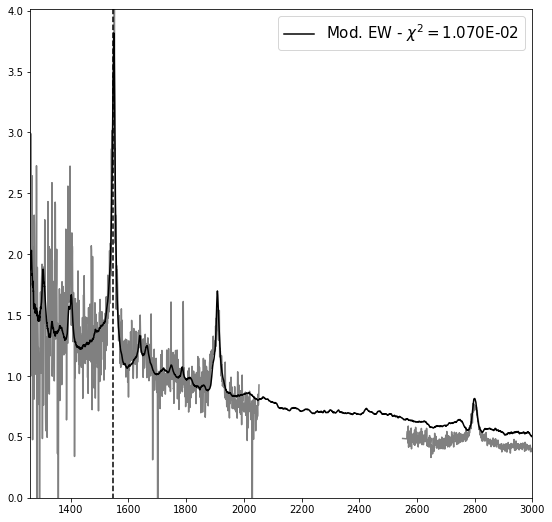

In [290]:
fig, ax1 = plt.subplots(1, 1, figsize=(9,9))

length = min(len(wave_mod),len(hst[0]))
fit_mod   = ICA_fit(components_mod[:,:length], wavelist[0], hst_normed[0], ivar[0], masks[0])
weights_mod = []
for j in fit_mod.params: weights_mod.append(fit_mod.params[j].value)
mod_chisq = fit_mod.redchi
ax1.plot(wavelist[0], hst[0]*1e15, '-', c='gray')
reconstruction = np.dot(weights_mod, components_mod)
ax1.plot(wave_mod, reconstruction, '-k', label="Mod. EW - $\chi^2=$%.3E" % (mod_chisq))
ax1.legend(loc="best", prop={"size":15})
ax1.set_xlim(1260,3000)
ax1.set_ylim(0,max(reconstruction)+0.2)
ax1.plot([1546,1546],[-4,5],"--k")

Especially given the DC offsets in SDSS/HST spectra, morphing should be very beneficial here...

See ``Cosmology_Quasars/autoencoders/autoencoder5_morphing_dr14.ipynb`` for how I'm approaching that (or just see below)

In [291]:
#fit a continuum

markers = {
    1: 1280,
    2: 1690,
    #3: 2200,
    3: 2040,
    #4: 2660,
    4: 2650,
    5: 2915
}

def continuum(wave, spec, markers):
    #Will do multiple different linear fits on different "regions" of the spectrum
    cont_region = {}
    
    for i in range(len(markers)-1):
        #get left (ind1) and right (ind2) indices of particular region
        ind1 = max( abs(wave-markers[i+1]).argmin(), 5 ) #sometimes this winds up on 4 and yy returns a nan - difference negligibla anyway
        ind2 = abs(wave-markers[i+1+1]).argmin()
        xx = [np.nanmedian(wave[(ind1-5):(ind1+5)]), np.nanmedian(wave[(ind2-5):(ind2+5)])]
        yy = [np.nanmedian(spec[(ind1-5):(ind1+5)]), np.nanmedian(spec[(ind2-5):(ind2+5)])]
        
        #do a linear fit on this region
        fit_region = np.polyfit(xx, yy, 1) 
        
        #if first marker fit on all pixels blueward; elif last all redward; else all in between
        if i==0:
            x = wave[:ind2]
        elif i==(len(markers)-2):
            x = wave[ind1:]
        else:
            x = wave[ind1:ind2]
        
        #Save fit as continuum of given region
        y = fit_region[0]*x + fit_region[1]
        cont_region[i] = [x, y]
    
    return np.concatenate((cont_region[0][1], cont_region[1][1], cont_region[2][1], cont_region[3][1]))#,
                           #cont_region[4][1]))

Need to reshape the morphing array so we can apply to these spectra.

In [292]:
def lin_slope(line):
    return (line[1,1]-line[0,1])/(line[1,0]-line[0,0])

In [293]:
morph_norm_orig = np.load("/Users/trevormccaffrey/Desktop/git/Cosmology_Quasars/morph/morph_ref_DR7mean_normed.npy")

wave_blue  = wave_mod[wave_mod<morph_norm_orig[:,0].min()]
slope_blue = lin_slope(morph_norm_orig[:5,:])
int_blue   = morph_norm_orig[0,1] - slope_blue*morph_norm_orig[0,0]
cont_blue  = np.array([wave_blue, slope_blue*wave_blue + int_blue]).T

wave_red   = wave_mod[wave_mod>morph_norm_orig[:,0].max()]
slope_red  = lin_slope(morph_norm_orig[-5:,:])
int_red    = morph_norm_orig[-1,1] - slope_red*morph_norm_orig[-1,0]
cont_red   = np.array([wave_red, slope_red*wave_red + int_red]).T

morph_norm = np.concatenate((cont_blue, morph_norm_orig, cont_red))[:-1,:]
morph_norm.shape

(3768, 2)

In [294]:
morph_norm_orig[-5:,:]

array([[2.9576250e+03, 6.9337207e-01],
       [2.9583069e+03, 6.9354099e-01],
       [2.9589875e+03, 6.9370961e-01],
       [2.9596680e+03, 6.9387823e-01],
       [2.9603506e+03, 6.9404733e-01]], dtype=float32)

In [295]:
slope_red

0.0002477245

In [296]:
test = np.array([wave_mod[:-1], hst_normed[0]]).T

In [297]:
sudo_mask = np.isnan(test[:,1])
test[sudo_mask,0]

array([2053.0522, 2053.525 , 2053.9979, 2054.4709, 2054.944 , 2055.4173,
       2055.8906, 2056.364 , 2056.8376, 2057.3112, 2057.785 , 2058.2589,
       2058.7329, 2059.207 , 2059.6812, 2060.1555, 2060.6299, 2061.1044,
       2061.5791, 2062.0538, 2062.5287, 2063.0037, 2063.4787, 2063.9539,
       2064.4292, 2064.9046, 2065.3802, 2065.8558, 2066.3315, 2066.8074,
       2067.2833, 2067.7594, 2068.2356, 2068.7118, 2069.1882, 2069.6647,
       2070.1413, 2070.6181, 2071.0949, 2071.5718, 2072.0489, 2072.5261,
       2073.0033, 2073.4807, 2073.9582, 2074.4358, 2074.9135, 2075.3913,
       2075.8693, 2076.3473, 2076.8255, 2077.3037, 2077.7821, 2078.2606,
       2078.7392, 2079.2179, 2079.6967, 2080.1756, 2080.6546, 2081.1338,
       2081.613 , 2082.0924, 2082.5719, 2083.0515, 2083.5312, 2084.011 ,
       2084.4909, 2084.9709, 2085.451 , 2085.9313, 2086.4117, 2086.8921,
       2087.3727, 2087.8534, 2088.3342, 2088.8151, 2089.2961, 2089.7773,
       2090.2585, 2090.7399, 2091.2213, 2091.7029, 

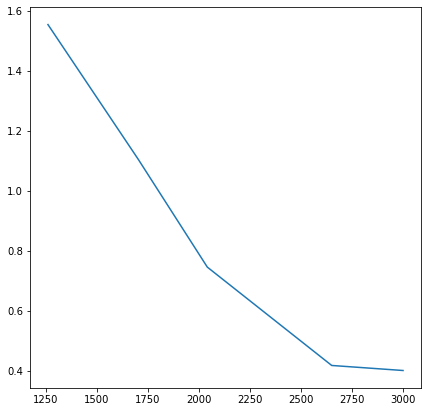

In [298]:
cont = continuum(wave_mod, hst_normed[0], markers).flatten()

fig = plt.figure(figsize=(7,7))
plt.plot(wave_mod, cont)

In [299]:
len(wavelist[0])

3767

3767


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767


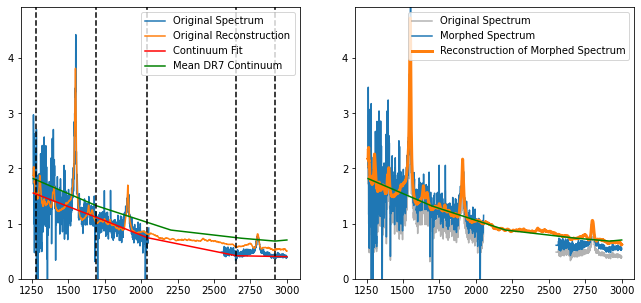

In [308]:
#Do a prelim fit on non-morphed spectrum to determine continuum - less noisy this way (at least ideally)
"""length = min(len(wave_mod),len(hst[0]))
fit_mod   = ICA_fit(components_mod[:,:length], wavelist[0], hst_normed[0], ivar[0], masks[0])
weights_mod = []
for j in fit_mod.params: weights_mod.append(fit_mod.params[j].value)
mod_chisq = fit_mod.redchi
specrec = np.dot(weights_mod, components_mod)

#Same as three cells above, but see if morphing does anything
cont = continuum(wave_mod, specrec, markers).flatten() #get reconstruction-based continuum
    
#Multiply spectrum by ratio of continuum of unreddened spectrum to that of original spectrum
morph_coeff = morph_norm[:,1] / cont 
spec_morphed = hst_normed[0] * morph_coeff[:-1]
"""
spec_morphed = morph(wavelist[0], hst_normed[0], ivar[0], masks[0], wave_mod, components_mod)

"""
fit_mod   = ICA_fit(components_mod[:,:length], wavelist[0], spec_morphed, ivar[0], masks[0])
weights_mod = []
for j in fit_mod.params: weights_mod.append(fit_mod.params[j].value)
mod_chisq = fit_mod.redchi
specrec_morphed = np.dot(weights_mod, components_mod)
"""
specrec_morphed, _ = ICA(wavelist[0], spec_morphed, ivar[0], masks[0], wave_mod, components_mod)

#specrec_morphed = morph_ae.predict(np.array([spec_morphed])).flatten()


#####Plot the results#####

fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(11,5))
ax1.plot(wave_mod.flatten()[:-1], hst_normed[0], label="Original Spectrum")
ax1.plot(wave_mod, specrec, label="Original Reconstruction")
ax1.plot(wave_mod, cont, "r", label="Continuum Fit")
ax1.plot(wave_mod, morph_norm[:,1], "g", label="Mean DR7 Continuum")
for i in range(len(markers)):
    ax1.plot([markers[i+1],markers[i+1]], [-2,8], "--k")
ax1.legend(loc="best")

ax2.plot(wave_mod.flatten()[:-1], hst_normed[0], color="black", alpha=0.3, label="Original Spectrum")
ax2.plot(wave_mod.flatten()[:-1], spec_morphed, label="Morphed Spectrum")
ax2.plot(wave_mod, specrec_morphed, linewidth=3, label="Reconstruction of Morphed Spectrum")
ax2.plot(wave_mod, morph_norm[:,1], "g")
ax2.set_ylim(0,max(specrec_morphed)+0.2)
ax2.legend(loc="best")

ax1.set_ylim(ax2.get_ylim())

plt.show()

In [301]:
markers[1]

1280

In [302]:
np.isnan(cont).sum(), len(cont)

(0, 3768)

**Problem:** The morphing array is shaped to just barely cover CIV--MgII, so it doesn'nt have the full wavelength coverage of these spectra.  This can be easily solved (albeit maybe not in a totally desirably) by just extrapolating the ends of the morphing array so that we have the same wavelength coverage.

Honestly, I should have saved the morphing arrays as N-by-2 arrays (including wavelength) instead of just the flux.

Update: Both items above have been addressed.

In [303]:
len(morph_norm), len(cont)

(3768, 3768)

In [304]:
def morph(wave, spec, ivar, mask, wave_reconst, components):
    #First do an ICA fit on the original spectrum - this eliminates noise from continuum construction
    spec_rec, _ = ICA(wave, spec, ivar, mask, wave_reconst, components)
    
    #Now fit continuum on unmorphed ICA reconstruction
    cont = continuum(wave_reconst, spec_rec, markers)
    
    #Now do the morphing - multiply spectrum by cont_meanDR7/cont_self
    morph_coeff = morph_norm[:,1] / cont 
    spec_morphed = spec * morph_coeff[:-1]
    return spec_morphed

def ICA(wave, spec, ivar, mask, wave_reconst, components):
    #Need masks et al to operate only in the wavelength domain which the current reconstructions cover
    mask_reconst = ((wave>wave_reconst.min()) & (wave<wave_reconst.max()))
    length = min(len(wave_reconst),len(spec))
    fit    = ICA_fit(components[:,:length], wave[mask_reconst], spec[mask_reconst], ivar[mask_reconst], mask[mask_reconst])
    weights= []
    for j in fit.params: weights.append(fit.params[j].value)
    spec_rec = np.dot(weights, components)
    return spec_rec, fit.redchi

In [305]:
masks.shape

(25, 3767)

For only low+high EW reconstructions, the reconstruction arrays are 

3767


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


value error
3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716
value error
3767


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3716


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


value error
3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716
value error
3767


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3716


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


value error
3767
3767
3716


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


value error
3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


3767
3767
3716
value error


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


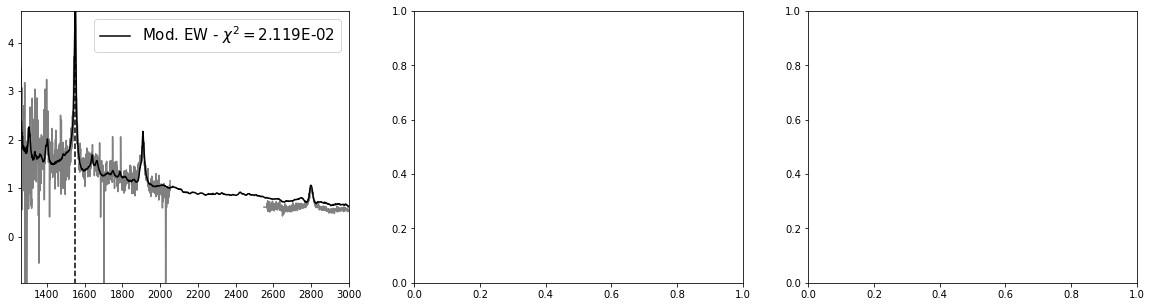

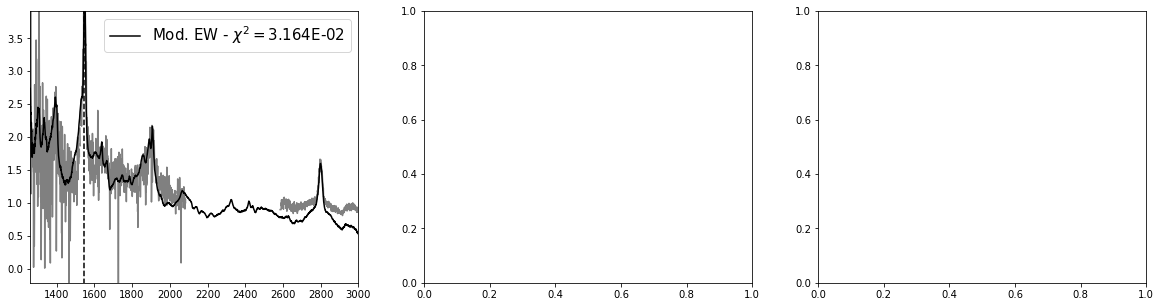

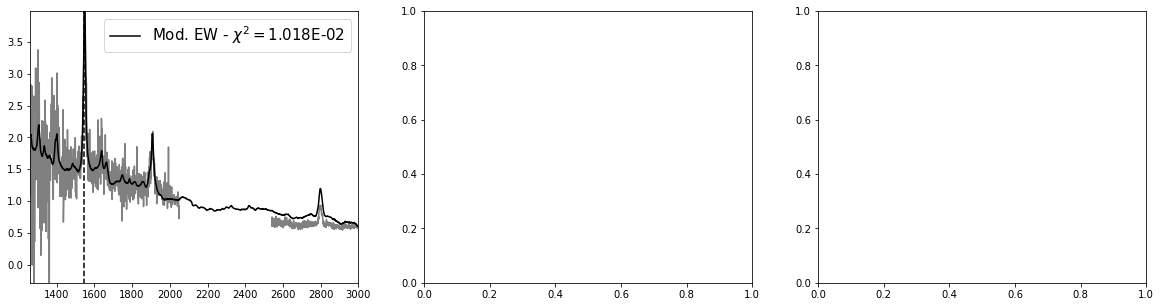

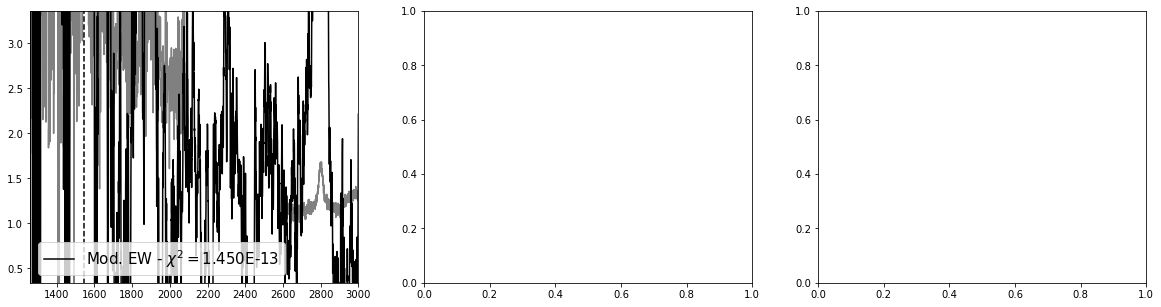

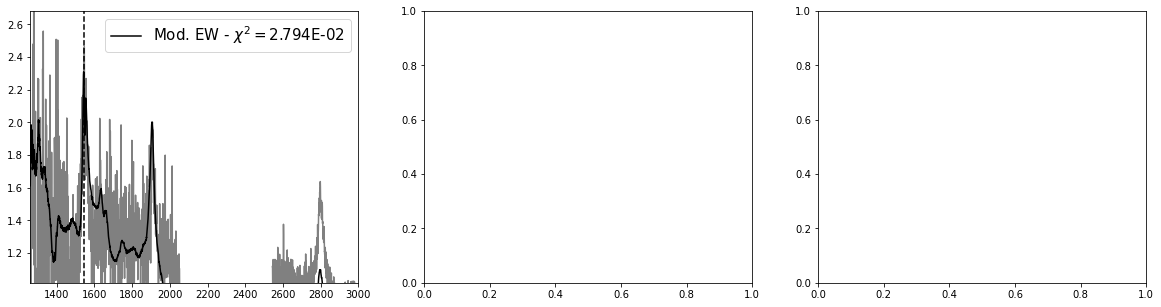

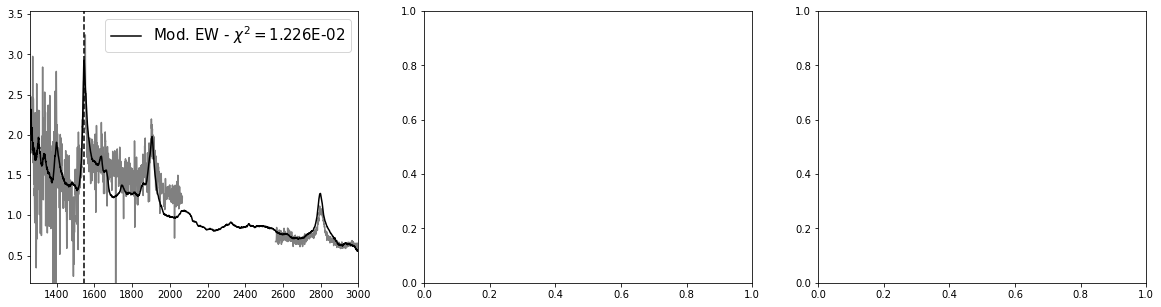

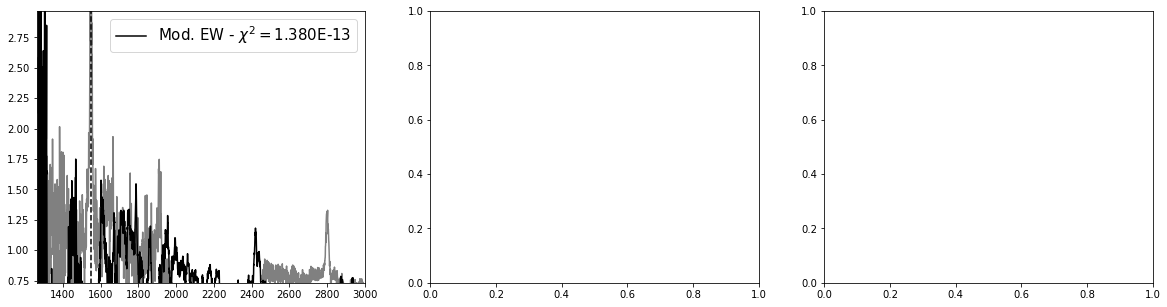

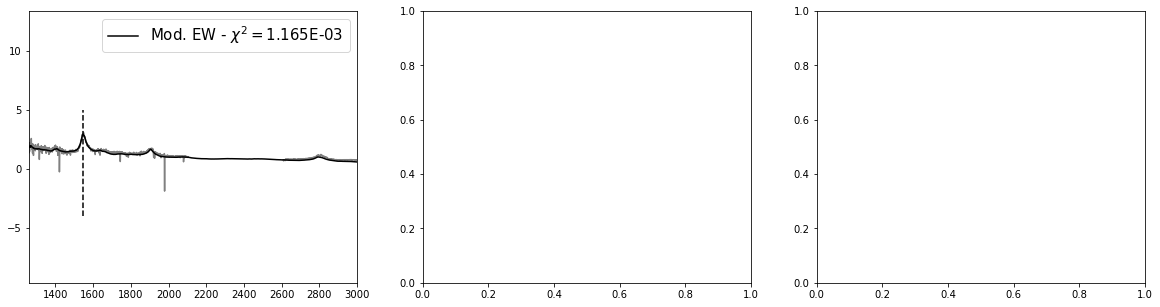

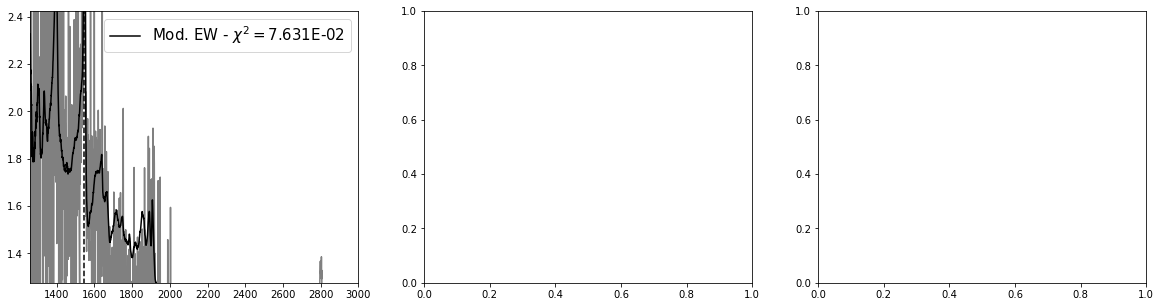

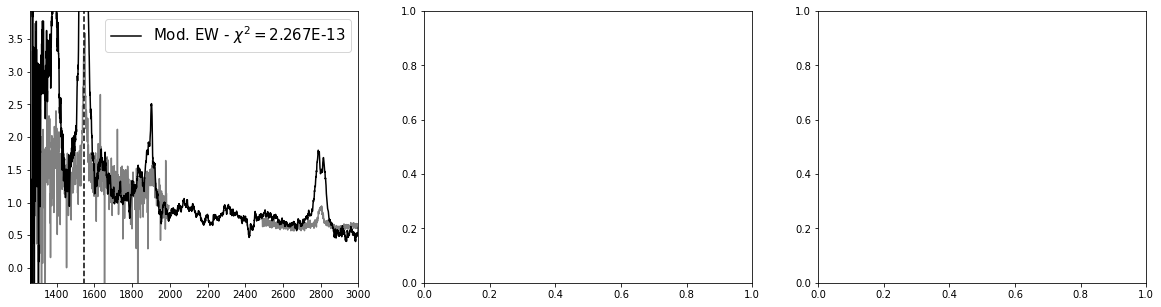

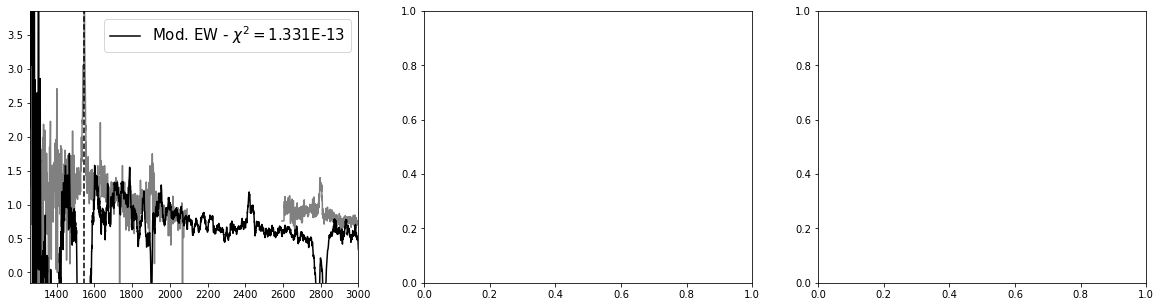

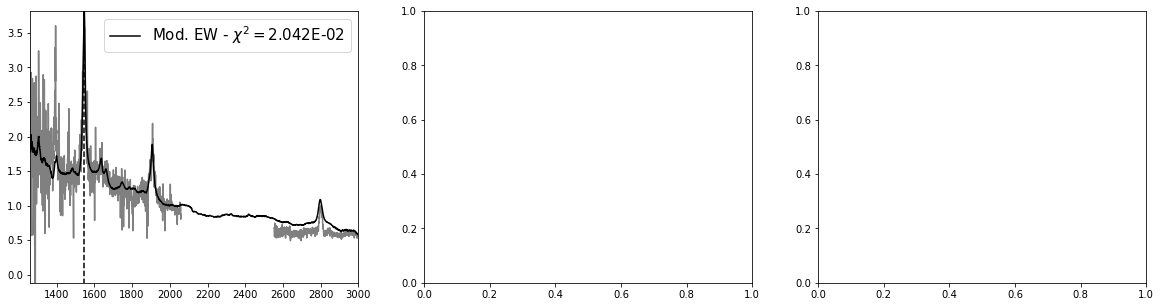

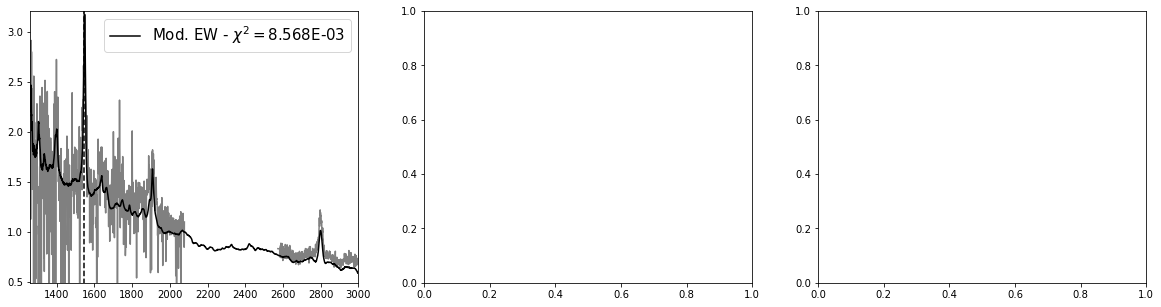

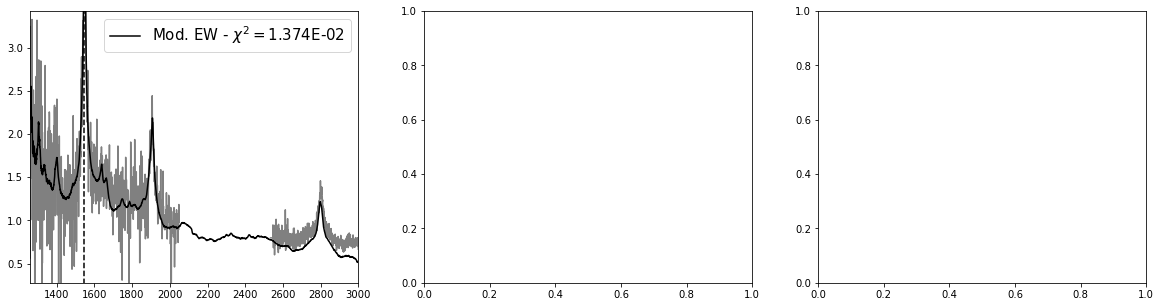

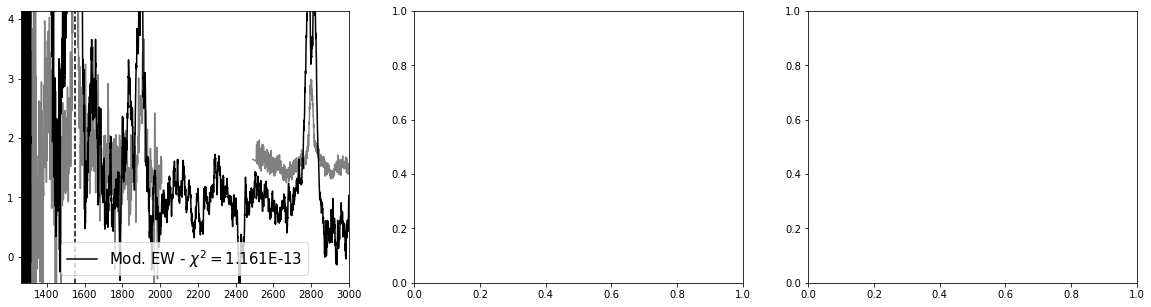

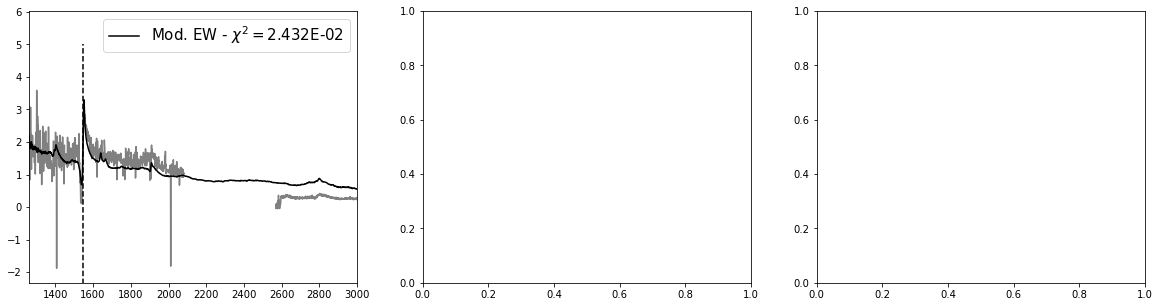

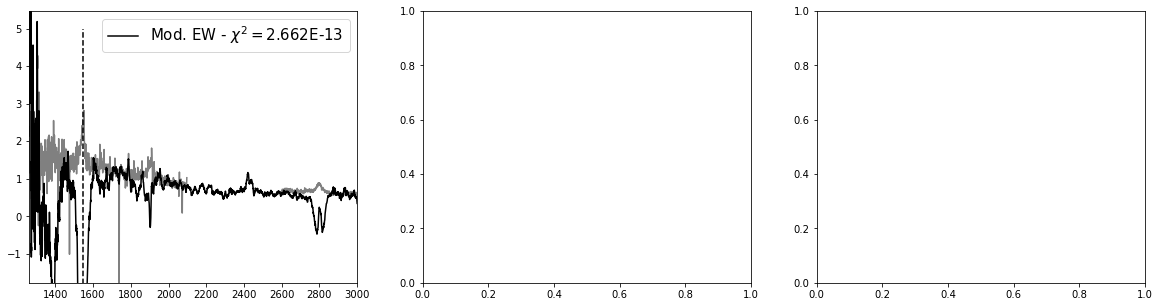

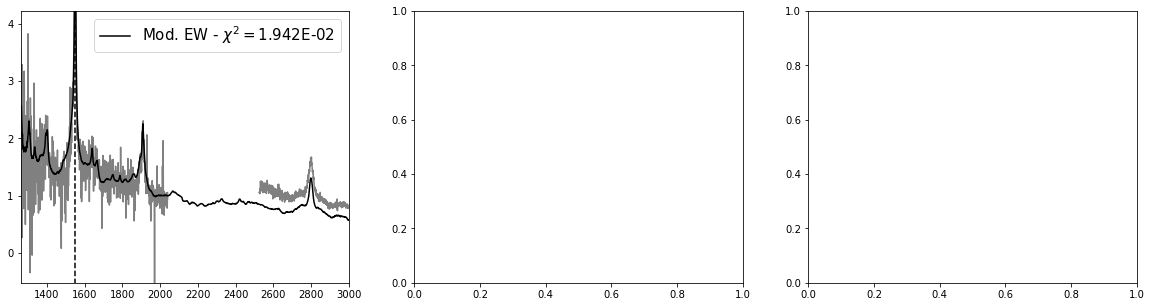

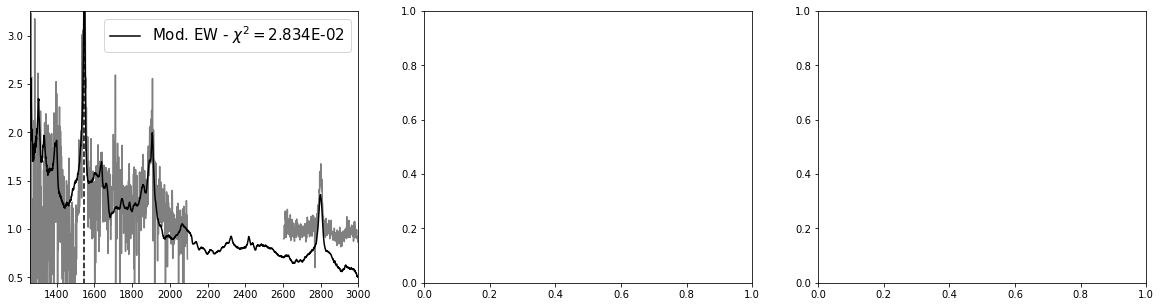

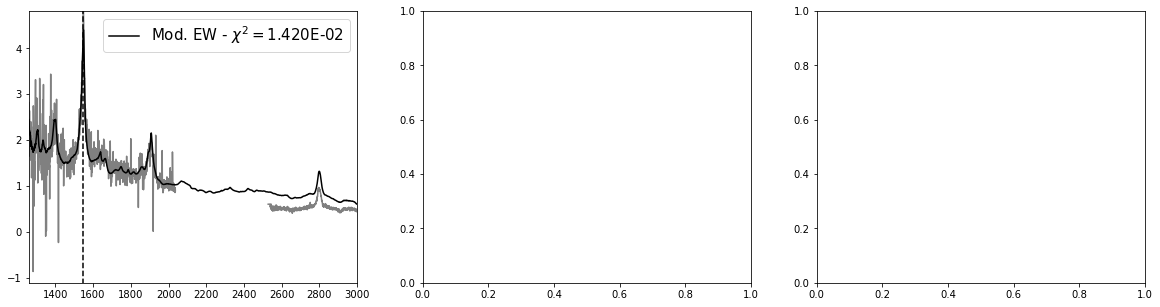

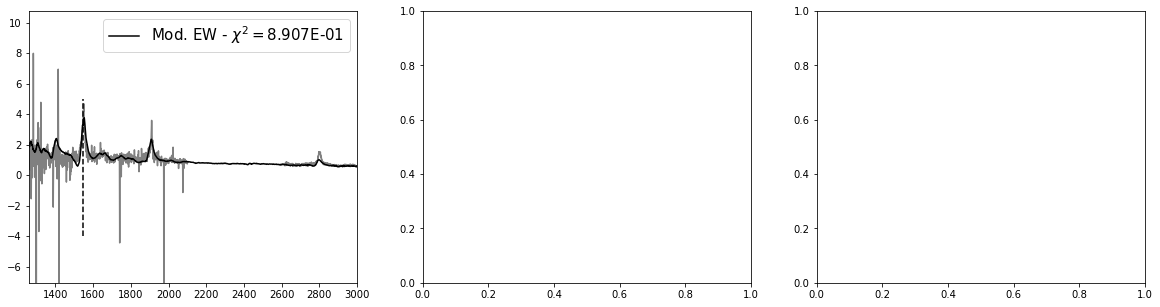

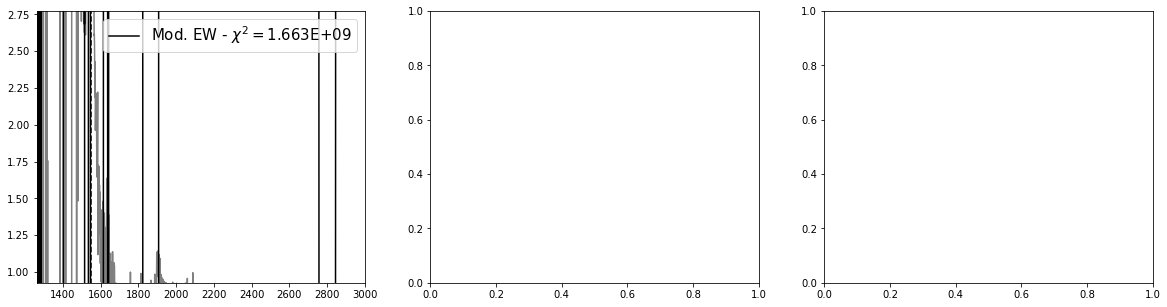

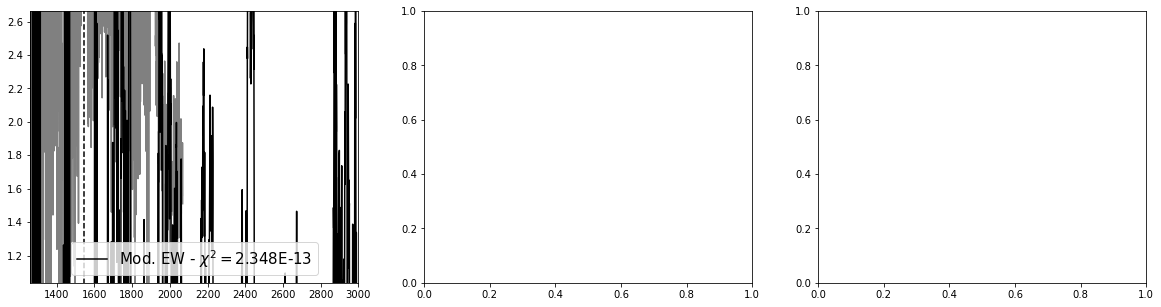

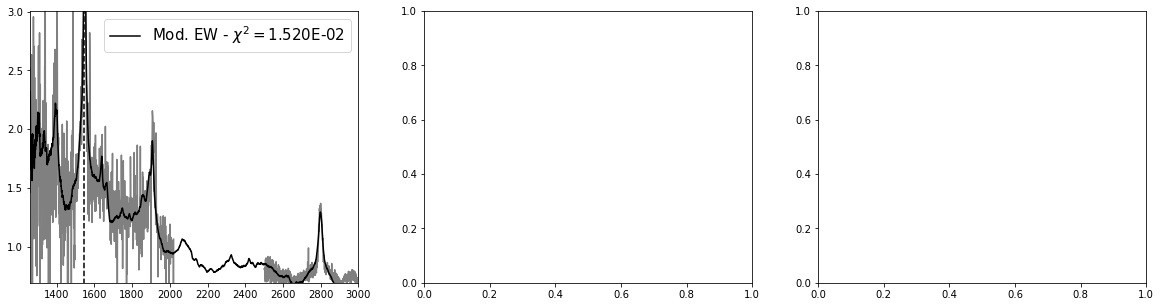

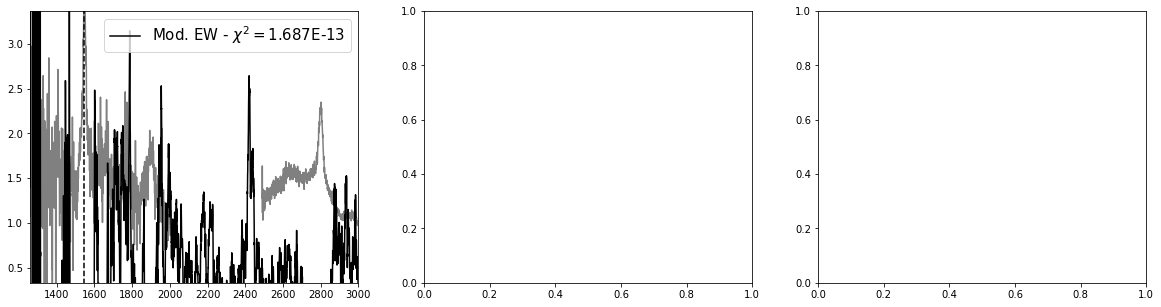

In [306]:
for i in range(len(hst)):
    try:
        fig, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(20,5))

        hst_morphed = morph(wavelist[i], hst_normed[i], ivar[i], masks[i], wave_mod, components_mod)
        reconst_mod, chisq_mod = ICA(wavelist[i], hst_morphed, ivar[i], masks[i], wave_mod, components_mod)
        ax1.plot(wavelist[i], hst_morphed, '-', c='gray')
        ax1.plot(wave_mod, reconst_mod, '-k', label="Mod. EW - $\chi^2=$%.3E" % (chisq_mod))
        ax1.legend(loc="best", prop={"size":15})
        ax1.set_xlim(1260,3000)
        ax1.set_ylim(-max(hst[i]*1e15)+3.5, max(hst[i]*1e15)+0.2)
        ax1.plot([1546,1546],[-4,5],"--k")

        hst_morphed = morph(wavelist[i], hst_normed[i], ivar[i], masks[i], wave_low, components_low)
        reconst_low, chisq_low = ICA(wavelist[i], hst_morphed, ivar[i], masks[i], wave_low, components_low)
        ax2.plot(wavelist[i], hst_morphed, '-', c='gray')
        ax2.plot(wave_low, reconst_low, '-k', label="low. EW - $\chi^2=$%.3E" % (chisq_low))
        ax2.legend(loc="best", prop={"size":15})
        ax2.set_xlim(1260,3000)
        
        hst_morphed = morph(wavelist[i], hst_normed[i], ivar[i], masks[i], wave_high, components_high)
        reconst_high, chisq_high = ICA(wavelist[i], hst_morphed, ivar[i], masks[i], wave_high, components_high)
        ax3.plot(wavelist[i], hst_morphed, '-', c='gray')
        ax3.plot(wave_high, reconst_high, '-k', label="high. EW - $\chi^2=$%.3E" % (chisq_high))
        ax3.legend(loc="best", prop={"size":15})
        ax3.set_xlim(1260,3000)

        if chisq_mod < chisq_low and chisq_mod < chisq_high:
            ax1.set_title("This one wins")
        elif chisq_low < chisq_mod and chisq_low < chisq_high:
            ax2.set_title("This one wins")
            #extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
            #fig.savefig('reconst.pdf', bbox_inches=extent.expanded(1.25, 1.25))
        elif chisq_high < chisq_low and chisq_high < chisq_mod:
            ax3.set_title("This one wins")

        print((masks[i][:length]!=0).sum())
        plt.show()
        
    
    #except IndexError:
        
    except ValueError:
        print("value error")
        continue
        
    

In [221]:
wave_low.shape

(3716,)

In [115]:
def bestICA(i):
    length = min(len(wave_mod),len(hst[i][ica_mask]))
    fit_mod   = ICA_fit(components_mod[:,:length], wavelist[i][ica_mask][:length], hst[i][ica_mask][:length]*1e15, ivar[i][ica_mask][:length], masks[i][ica_mask][:length])
    mod_chisq = fit_mod.chisqr

    length = min(len(wave_low),len(hst[i][ica_mask]))
    fit_low   = ICA_fit(components_low[:,:length], wavelist[i][ica_mask][:length], hst[i][ica_mask][:length]*1e15, ivar[i][ica_mask][:length], masks[i][ica_mask][:length])
    low_chisq = fit_low.chisqr

    length = min(len(wave_high),len(hst[i][ica_mask]))
    fit_high   = ICA_fit(components_high[:,:length], wavelist[i][ica_mask][:length], hst[i][ica_mask][:length]*1e15, ivar[i][ica_mask][:length], masks[i][ica_mask][:length])
    high_chisq = fit_high.chisqr

    #Just return mod EW
    weights = []
    for j in fit_mod.params: weights.append(fit_mod.params[j].value)
    return wave_mod, np.dot(weights, components_mod)
    
    if min(mod_chisq, low_chisq, high_chisq) is low_chisq:
        weights = []
        for j in fit_low.params: weights.append(fit_low.params[j].value)
        return wave_low, np.dot(weights, components_low)
    elif min(mod_chisq, low_chisq, high_chisq) is high_chisq:
        weights = []
        for j in fit_high.params: weights.append(fit_high.params[j].value)
        return wave_high, np.dot(weights, components_high)
    else:
        weights = []
        for j in fit_mod.params: weights.append(fit_mod.params[j].value)
        return wave_mod, np.dot(weights, components_mod)

In [20]:
components_mod.shape

(10, 3768)

---

## Autoencoder

Need training data that covers wavelength range of all of these spectra.  The largest common wavelength range for the HST spectra is 1170-1940Å

DR14 covers 3610-10140 Å, so we can use the following redshift range for training data:

$$ z_\mathrm{min} = 3610/1170 - 1 = 2.085 $$ and

$$ z_\mathrm{max} = 10140/1940 - 1 = 4.227 $$

... which gives how many spectra?

In [21]:
tab = Table.read("/Users/trevormccaffrey/Desktop/Research/GTR/VLA2018b/DR14/DR14Q_v4_4.fits", format="fits")
dr14 = tab.to_pandas()
dr14.head()

SDSS_NAME        RA        DEC   THING_ID  PLATE    MJD  \
0  b'000000.45+174625.4'  0.001898  17.773739  268270422   7596  56945   
1  b'000000.57+055630.8'  0.002375   5.941903  163544156   8740  57367   
2  b'000000.66+145828.8'  0.002756  14.974675  244864389   6177  56268   
3  b'000000.97+044947.2'  0.004052   4.829781  154078229   4415  55831   
4  b'000001.20+240354.5'  0.005026  24.065163  319918739   7666  57339   

   FIBERID  SPECTRO        Z  Z_ERR  ...         JFLUX     JFLUX_ERR  \
0      162  b'BOSS'  2.30900    0.0  ...  0.000000e+00  0.000000e+00   
1      694  b'BOSS'  2.10312    0.0  ...  1.229889e-31  4.504542e-32   
2      595  b'BOSS'  2.49700    0.0  ...  2.310948e-31  4.565332e-32   
3      464  b'BOSS'  1.61900    0.0  ...  6.597500e-31  4.154652e-32   
4      121  b'BOSS'  1.61621    0.0  ...  0.000000e+00  0.000000e+00   

          HFLUX     HFLUX_ERR         KFLUX     KFLUX_ERR  FIRST_MATCHED  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00             -1   
1  1.496425e-31  4.729050e-32  2.459819e-31  5.689572e-32              0   
2  2.355314e-31  5.970480e-32  2.427149e-31  6.521724e-32              0   
3  9.038160e-31  4.420332e-32  8.567425e-31  5.178768e-32              0   
4  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00             -1   

   FIRST_FLUX  FIRST_SNR  SDSS2FIRST_SEP  
0        -1.0       -1.0            -1.0  
1        -1.0       -1.0            -1.0  
2        -1.0       -1.0            -1.0  
3        -1.0       -1.0            -1.0  
4        -1.0       -1.0            -1.0  

[5 rows x 96 columns]

In [22]:
(dr14["BI_CIV"]!=0).sum()

21877

In [23]:
((dr14["Z"]>2.085)&(dr14["Z"]<4.227)).sum()

214571

Apparently quite a lot.  Save the first 50,000.

In [24]:
((dr14["Z"]>2.09)&(dr14["Z"]<2.28)).sum()

50620

In [25]:
! ls ../data

10c_flux_weight_data                   LOFAR_spectra
DR14_zmin039_zmax068.csv               RebinnedHSTData
DR14_zmin2085_zmax4227.csv             VLAspectra_all8403
DR14_zmin209_zmax228.csv               grdr7.8403col.radec.platemjdfiber.csv
HST_Chandra_Redshifts.csv              s7_flux_weight_data
HST_Reconstructions                    speclist_8403_VLA_colselected.txt
HST_SDSS_Data                          speclist_LOFAR.txt
HST_train                              total_flux_weight_data
LOFAR_from8403colorselected_all388.csv


dr14[((dr14["Z"]>2.09)&(dr14["Z"]<2.28))].to_csv("../data/DR14_zmin209_zmax228.csv")

Save the file formats in a text file.  Then can use to query SDSS database.

! awk -F "," 'NR>1 {printf "%04d/spec-%04d-%05d-%04d.fits\n", $6,$6,$7,$8}' \
../data/DR14_zmin209_zmax228.csv > ../data/HST_train/spec_list_dr14_zmin209_zmax228.txt

Run this command to save the text file:

`` awk -F "," 'NR>1 {printf "%04d/spec-%04d-%05d-%04d.fits\n", $6,$6,$7,$8}' \
../data/DR14_zmin209_zmax228.csv > ../data/HST_train/spec_list_dr14_zmin209_zmax228.txt ``

And this one to ask SDSS for the spectra; it will create a directory called "lite/" containing the spectra inside your current working directory: 

`` wget -nv -r -nH --cut-dirs=7 \
-i spec_list_dr14_zmin209_zmax228.txt \
-B https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/``

Note that the above URL doesn't actually have all the SDSS spectra and will return a not found error for those.  Some with lower plate numbers won't show up.  I think this is because some of just saved from earlier SDSS projects?  If you want all spectra, run the command above first, then run it again but swap the current URL for this one: https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite/.  The second command will run a lot slower, but you should recover pretty much all of the missed spectra.

Final stats for the wget query:

``
FINISHED --2021-06-04 12:42:06--
Total wall clock time: 1h 56m 25s
Downloaded: 48750 files, 9.9G in 34m 53s (4.86 MB/s)
``

So you could get most of the 50620-48750=1870 "missing" spectra by swapping URLs above.  But that's not really worth my trouble right now.

----

Load in the training data

In [26]:
dr14_sub = pd.read_csv("../data/DR14_zmin209_zmax228.csv")
dr14_sub.head()

Unnamed: 0              SDSS_NAME        RA        DEC   THING_ID  PLATE  \
0           1  b'000000.57+055630.8'  0.002375   5.941903  163544156   8740   
1           9  b'000001.55-003332.6'  0.006464  -0.559066   85757473   7850   
2          12  b'000001.64+003459.4'  0.006855   0.583184  107544612   7848   
3          15  b'000001.93-001427.4'  0.008067  -0.240971   87711992   4216   
4          23  b'000002.46+214939.3'  0.010286  21.827593  302509815   7595   

     MJD  FIBERID  SPECTRO         Z  ...         JFLUX     JFLUX_ERR  \
0  57367      694  b'BOSS'  2.103120  ...  1.229889e-31  4.504542e-32   
1  56956      711  b'BOSS'  2.219141  ...  0.000000e+00  0.000000e+00   
2  56959      928  b'BOSS'  2.271102  ...  0.000000e+00  0.000000e+00   
3  55477      312  b'BOSS'  2.163000  ...  3.333770e-31  3.747827e-32   
4  56957      764  b'BOSS'  2.105861  ...  0.000000e+00  0.000000e+00   

          HFLUX     HFLUX_ERR         KFLUX     KFLUX_ERR  FIRST_MATCHED  \
0  1.496425e-31  4.729050e-32  2.459819e-31  5.689572e-32              0   
1  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00              0   
2  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00              0   
3  3.429379e-31  7.670890e-32  4.916812e-31  6.641088e-32              0   
4  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00             -1   

   FIRST_FLUX  FIRST_SNR  SDSS2FIRST_SEP  
0        -1.0       -1.0            -1.0  
1        -1.0       -1.0            -1.0  
2        -1.0       -1.0            -1.0  
3        -1.0       -1.0            -1.0  
4        -1.0       -1.0            -1.0  

[5 rows x 97 columns]

In [27]:
z     = dr14_sub[["Z"]].values.flatten()
plate = dr14_sub[["PLATE"]].values.flatten()
mjd   = dr14_sub[["MJD"]].values.flatten()
fiber = dr14_sub[["FIBERID"]].values.flatten()
BAL   = dr14_sub[["BI_CIV"]].values.flatten()!=0

In [28]:
BAL.sum()

3557

(-3.0, 8.0)

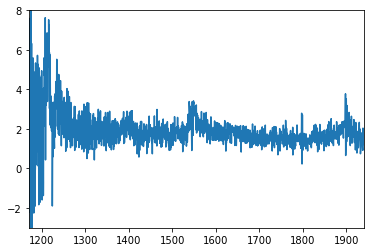

In [29]:
#Load in data from each FITS file
hdul_spec = fits.open("../data/HST_train/lite_highz/8740/spec-8740-57367-0694.fits")
sdss_flux   = hdul_spec[1].data["flux"]
sdss_loglam = hdul_spec[1].data["loglam"]
sdss_wave   = 10.**(sdss_loglam)  / (1+2.103120) #x-axis: wavelength
sdss_ivar   = hdul_spec[1].data["ivar"]

plt.plot(sdss_wave, sdss_flux)
plt.xlim(1170,1940)
plt.ylim(-3,8)

In [30]:
((sdss_wave>1260) & (sdss_wave<1940)).sum()

1875

So rebinning worked well.  Although there are only 2194 pixels in some of the HST spectra, so just save the first 2194 for the retrieved SDSS spectra as well.

Load in the SDSS data

In [32]:
spec_path = "../data/HST_train/lite_highz/"

spectra = [] #python list **way** faster than np.append - convert to array at end
wave    = []
N = 0

for red, pl, mj, fib, bal in zip(z, plate, mjd, fiber, BAL):
    try:
        hdul_spec = fits.open(spec_path+"%04d/spec-%04d-%05d-%04d.fits" % (pl,pl,mj,fib))
    except FileNotFoundError:
        #print(spec_path+"%04d/spec-%04d-%05d-%04d.fits NOT FOUND" % (pl,pl,mj,fib))
        continue
        
    #Load in data from each FITS file
    sdss_flux   = hdul_spec[1].data["flux"]
    sdss_loglam = hdul_spec[1].data["loglam"]
    sdss_wave   = 10.**(sdss_loglam) / (1+red)  #x-axis: wavelength
    
    #Want the same wavelength range for each array
    wavemask   = ((sdss_wave>1260) & (sdss_wave<1970))
    sdss_flux  = sdss_flux[wavemask]
    #sdss_flux /= np.median(sdss_flux) #normalize spectrum
    sdss_wave  = sdss_wave[wavemask]
    hdul_spec.close()
    
    if len(sdss_flux) >= 1941 and ~bal: #train on non-BALs in hope that this will prevent it from modeling troughs
        spectra.append(sdss_flux[:1941]) #Some might have one extra pixel
        wave.append(sdss_wave[:1941])
            
    N+=1
    if N%5000==0: print(N)
        
spectra = np.array(spectra)
wave = np.array(wave)

5000
10000
15000
20000
25000
30000
35000
40000
45000


In [33]:
wave.shape, spectra.shape

((43967, 1941), (43967, 1941))

---

Build autoencoder.  See, e.g., Chapters 11 and 17 of Geron, "Hands-on Machine Learning with Sci-kit Learn, Keras, and Tensorflow"

In [34]:
import tensorflow.keras.backend as K

In [35]:
n_latent = 10
MASKK= (~((wave[0]>1490)&(wave[0]<1546))).astype(int) #Mask CIV absorption
MASK = K.variable(MASKK)

#Build the encoder - the dimension of the final layer is the dimension of the latent space
stacked_encoder = keras.models.Sequential([
    keras.layers.Input(shape=spectra[0].shape),
    keras.layers.Lambda(lambda x: x*MASK), #this layer is the mask - turn off corresponding neurons
    keras.layers.Dropout(0.2),
    #keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.PReLU(),
    keras.layers.Dense(200, kernel_initializer="he_normal"),
    #keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.PReLU(),
    keras.layers.Dense(50, kernel_initializer="he_normal"),
    #keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.PReLU(),
    keras.layers.Dense(n_latent, kernel_initializer="he_normal")
])

#Build the decoder - given values in latent space, it will reconstruct the original spectrum
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(50, kernel_initializer="he_normal", input_shape=[n_latent]),
    #keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.PReLU(),
    keras.layers.Dense(200, kernel_initializer="he_normal"),
    #keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.PReLU(),
    keras.layers.Dense(spectra[0].shape[0]) #no activation function since we want actual pixel values
])

#Now put them together
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

In [42]:
stacked_ae.compile(loss="logcosh", optimizer=keras.optimizers.Nadam(lr=3e-5))

In [43]:
X_train = spectra[:28000]
X_valid = spectra[28000:40000]
X_test  = spectra[40000:]

history = stacked_ae.fit(X_train, X_train, epochs=15,
                         validation_data=[X_valid, X_valid])

Train on 28000 samples, validate on 12000 samples
Epoch 1/15
28000/28000 [==============================] - 42s 2ms/sample - loss: 0.1242 - val_loss: 0.1244
Epoch 2/15
28000/28000 [==============================] - 46s 2ms/sample - loss: 0.1240 - val_loss: 0.1244
Epoch 3/15
28000/28000 [==============================] - 48s 2ms/sample - loss: 0.1242 - val_loss: 0.1226
Epoch 4/15
28000/28000 [==============================] - 46s 2ms/sample - loss: 0.1242 - val_loss: 0.1232
Epoch 5/15
28000/28000 [==============================] - 47s 2ms/sample - loss: 0.1242 - val_loss: 0.1232
Epoch 6/15
28000/28000 [==============================] - 40s 1ms/sample - loss: 0.1239 - val_loss: 0.1227
Epoch 7/15
28000/28000 [==============================] - 47s 2ms/sample - loss: 0.1240 - val_loss: 0.1233
Epoch 8/15
28000/28000 [==============================] - 46s 2ms/sample - loss: 0.1239 - val_loss: 0.1228
Epoch 9/15
28000/28000 [==============================] - 46s 2ms/sample - loss: 0.1239 - val_

In [44]:
test_num = 201
reconst = stacked_ae.predict(np.array([X_test[test_num]]))

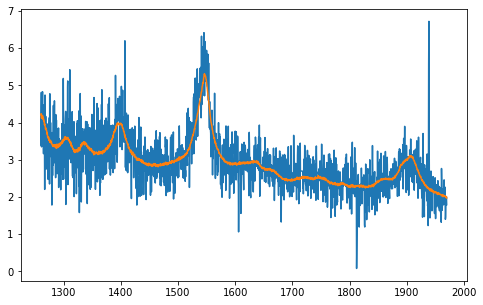

In [45]:
fig = plt.figure(figsize=(8,5))

#plt.plot(wave[800], spectra[800])
plt.plot(wave[40000+test_num], X_test[test_num])
plt.plot(wave[40000+test_num], reconst[0])
plt.show()

In [46]:
n_spectra = 30
reconst = stacked_ae.predict(np.array(X_test[:n_spectra]))

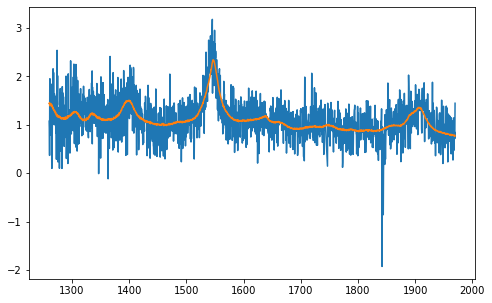

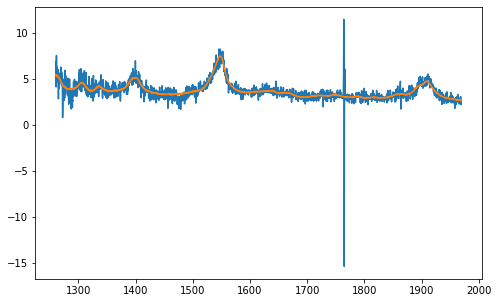

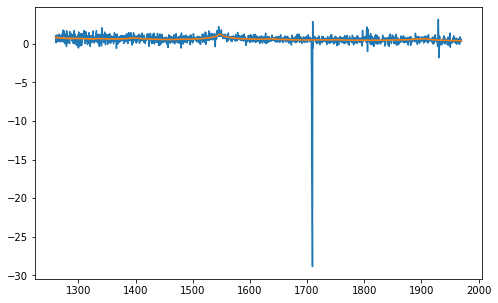

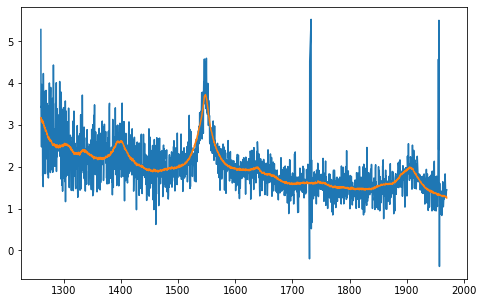

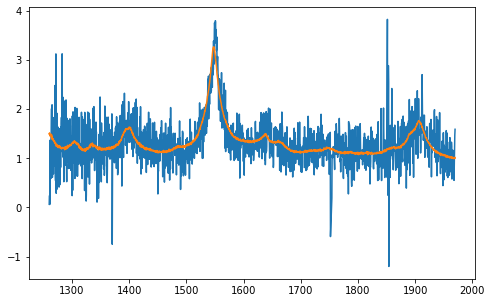

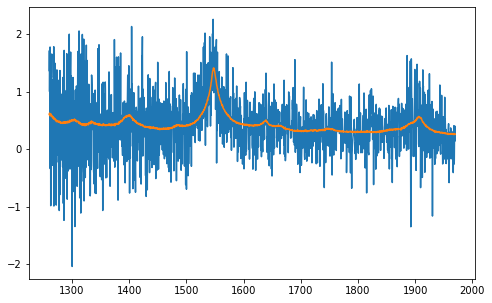

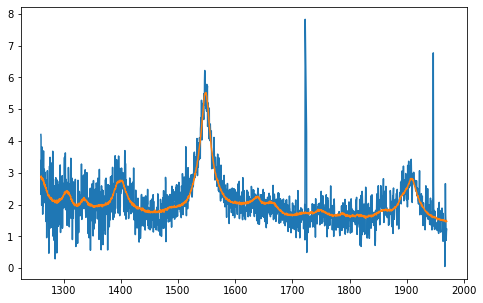

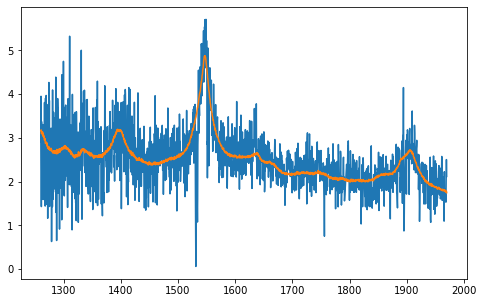

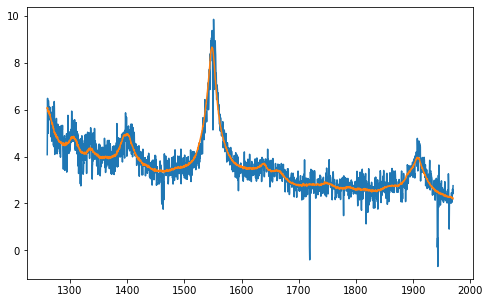

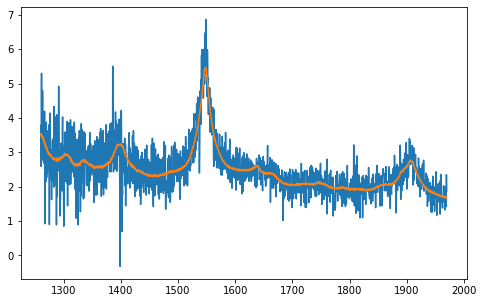

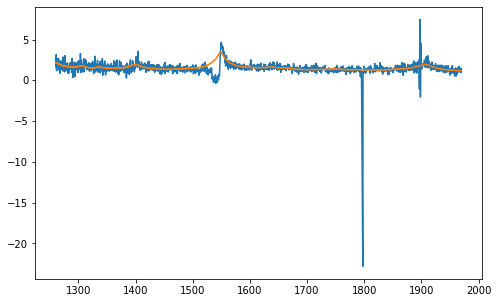

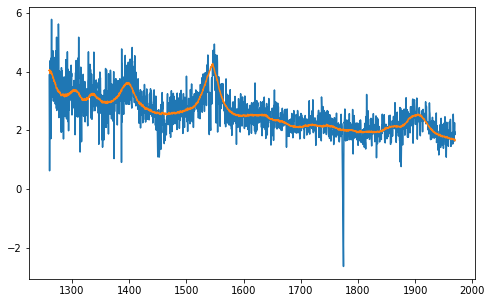

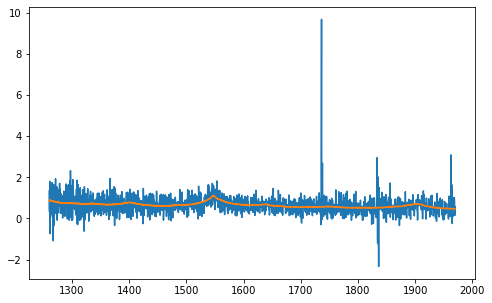

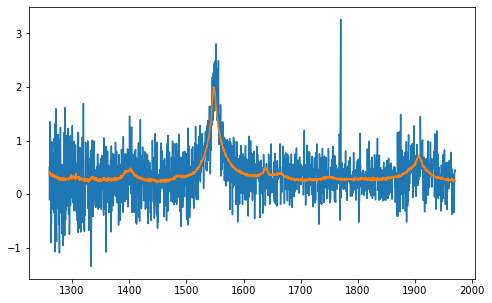

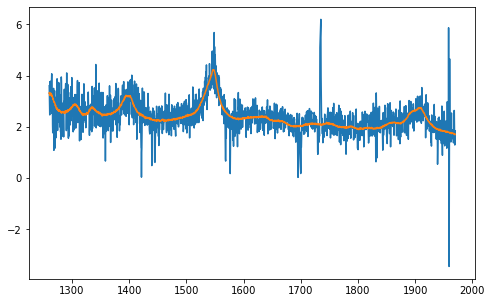

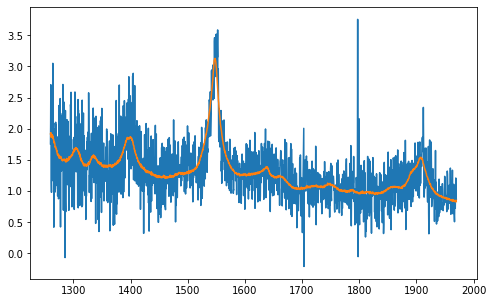

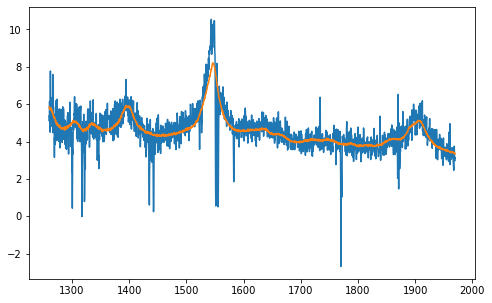

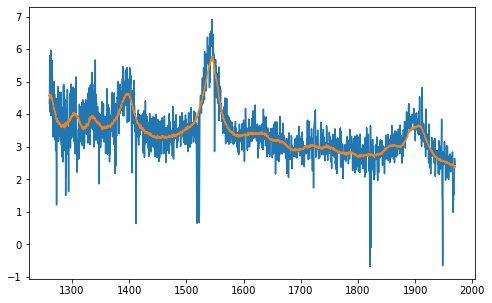

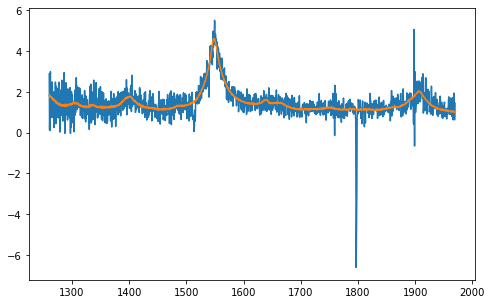

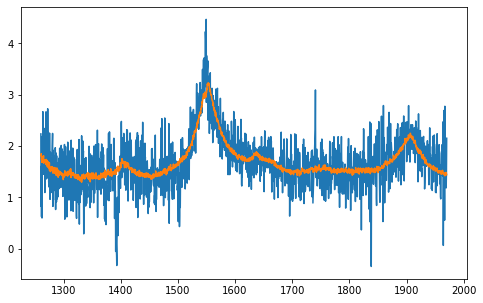

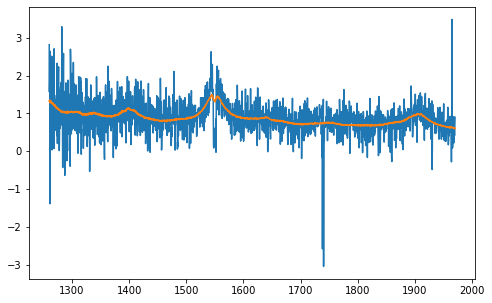

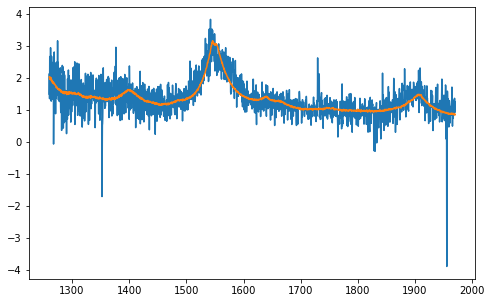

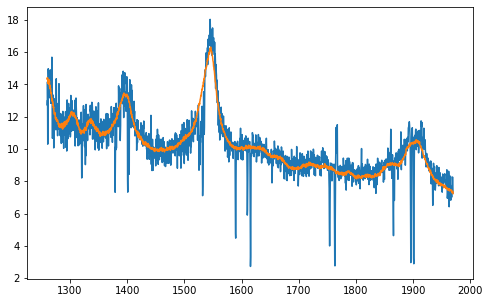

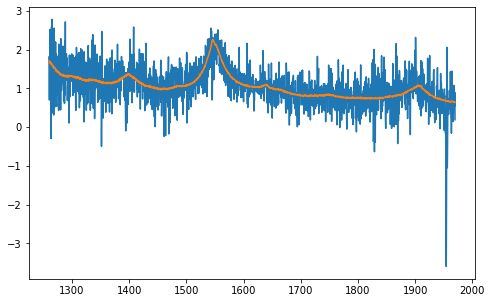

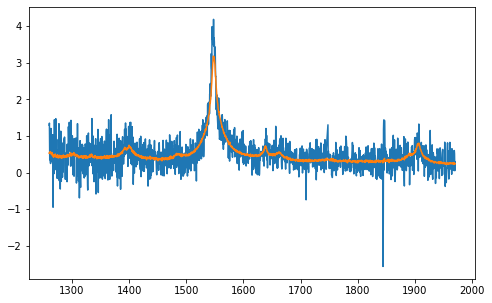

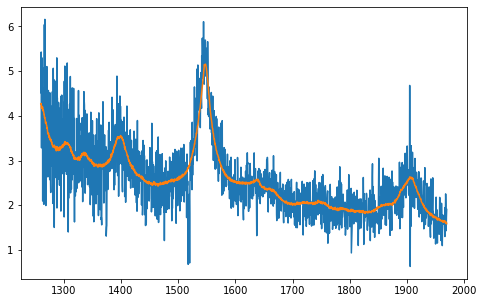

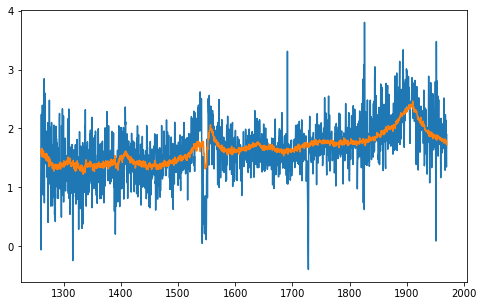

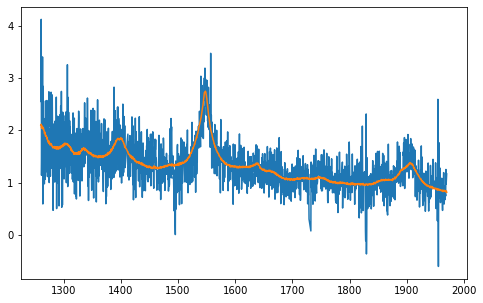

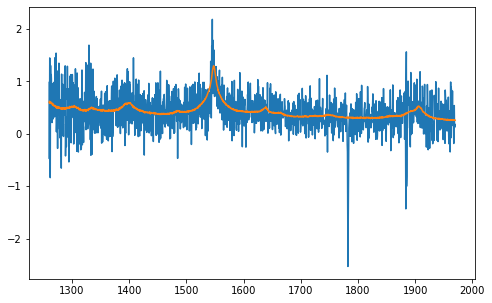

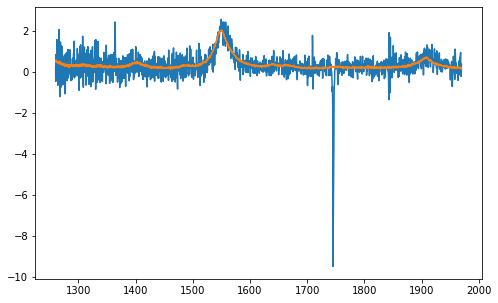

In [47]:
for i in range(n_spectra):
    #reconst = stacked_ae.predict(np.array([X_valid[i]]))
    fig = plt.figure(figsize=(8,5))
    plt.plot(wave[40000+i], X_test[i])
    plt.plot(wave[40000+i], reconst[i])
    plt.show()

Autoencoder does mostly well on test set.  Could add more masking.  Could also probably get better reconstructions if removing Ly$\alpha$ part of the spectrum.

In [98]:
#Handle nans in flux array for 1 object - NN doesn't like getting nans
hst_test = hst.copy()
np.isnan(hst_test[1]).any()

True

In [99]:
#This part of spectrum is masked for autoencoder anyway - just need non-nans
hst_test[1][np.isnan(hst_test[1])] = np.median(hst_test[1][~np.isnan(hst_test[1])])
np.isnan(hst_test[1]).any()

False

In [100]:
hst_reconst = stacked_ae.predict(hst_test*1e15)

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


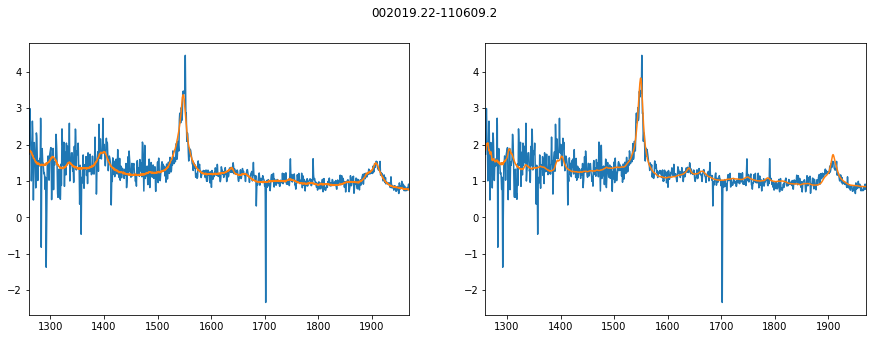

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


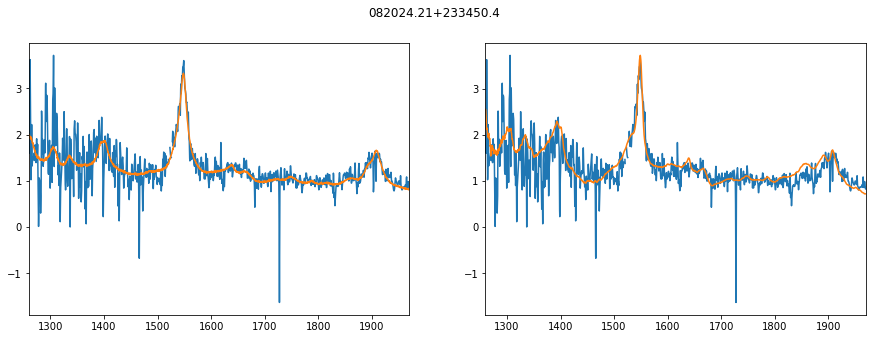

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


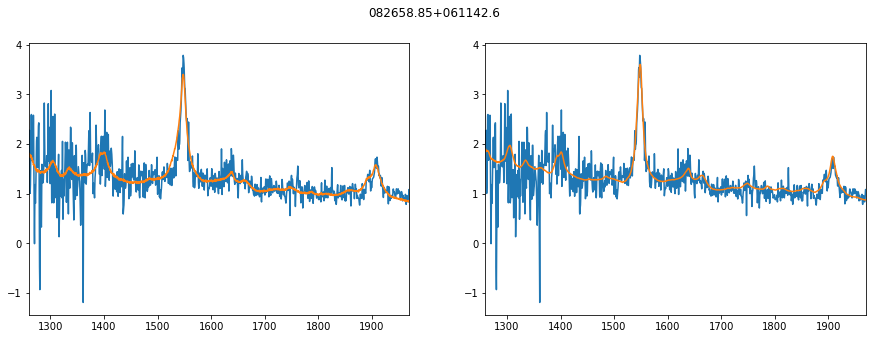

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


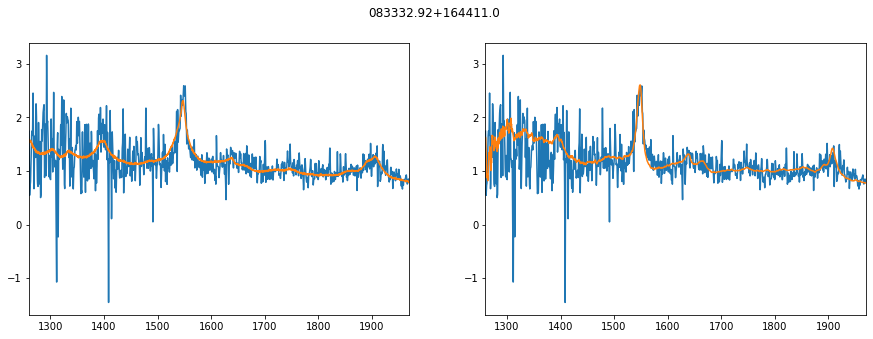

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


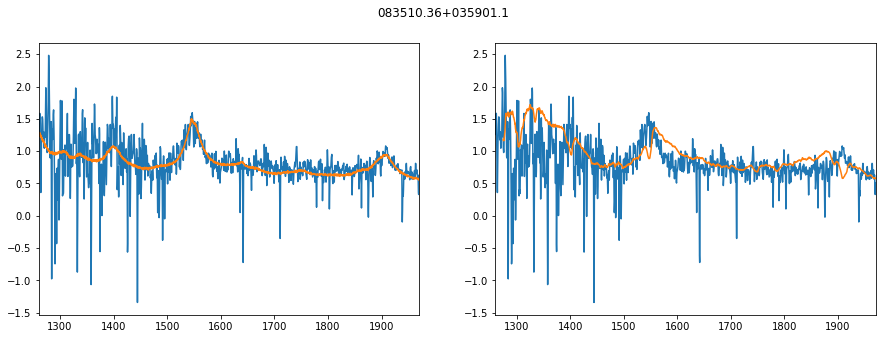

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


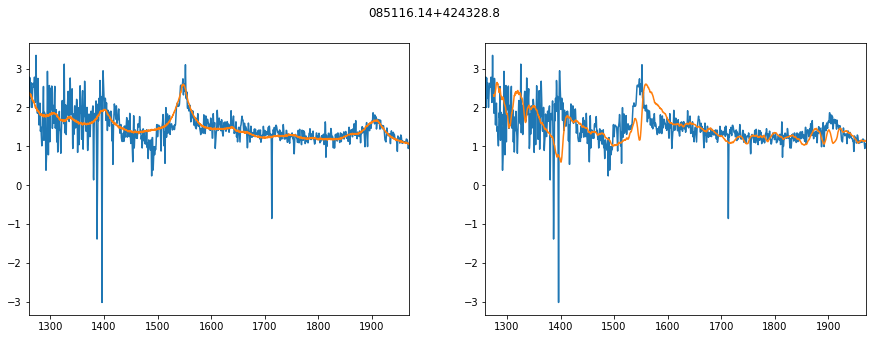

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


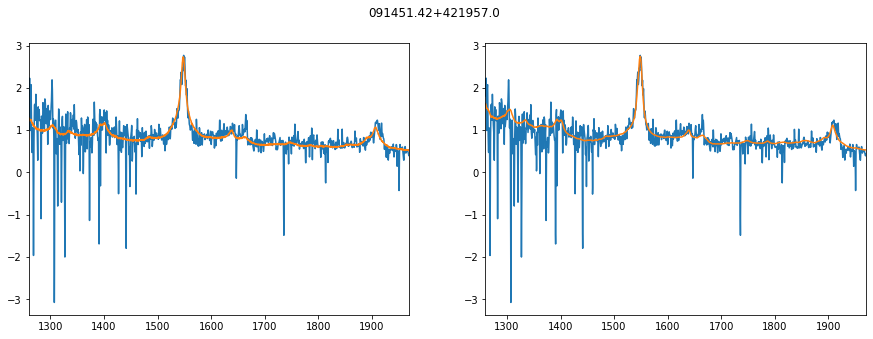

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


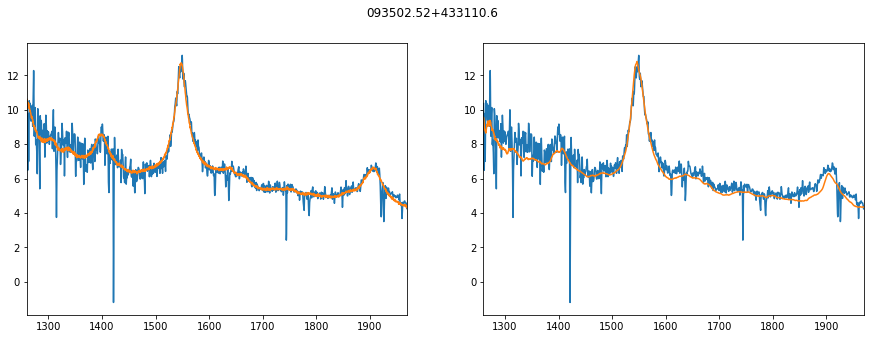

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


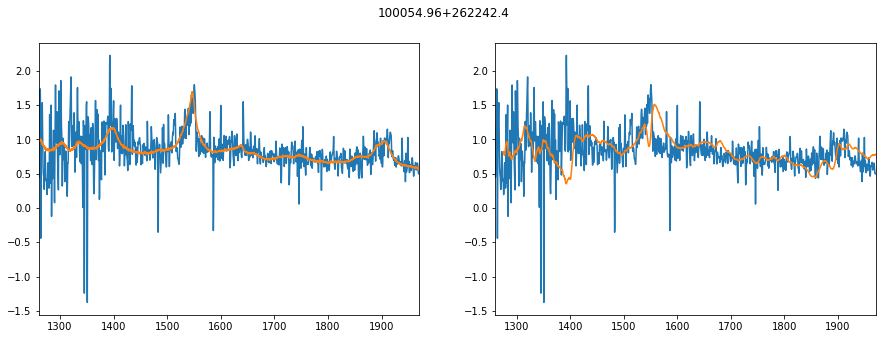

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


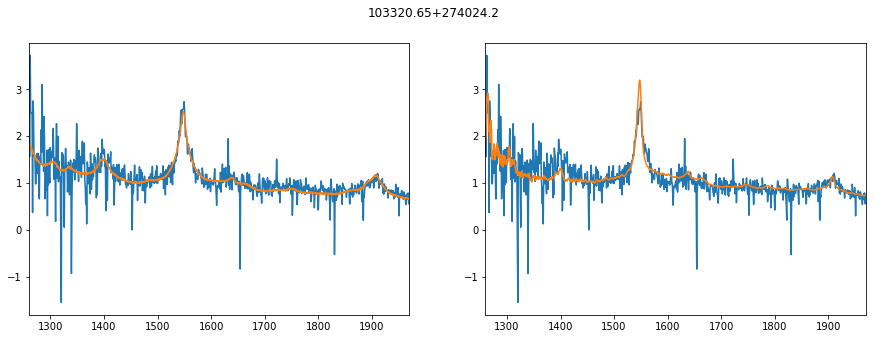

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


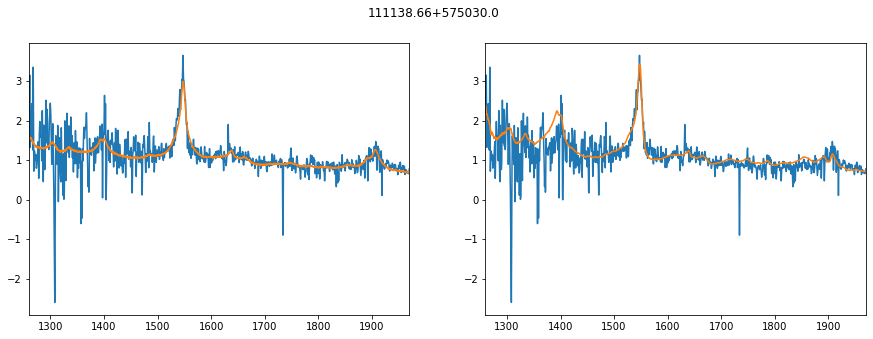

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


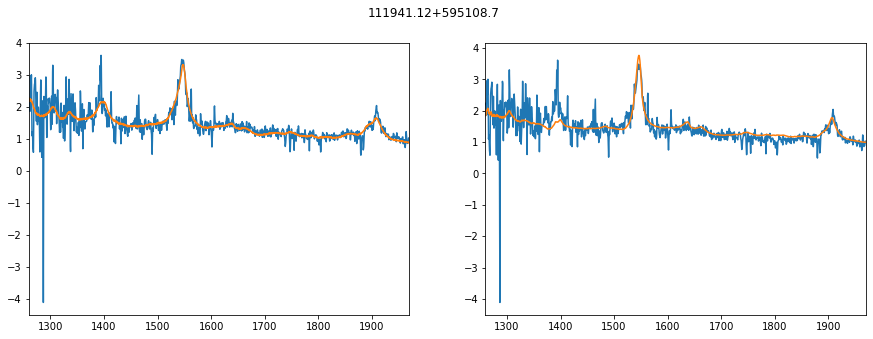

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


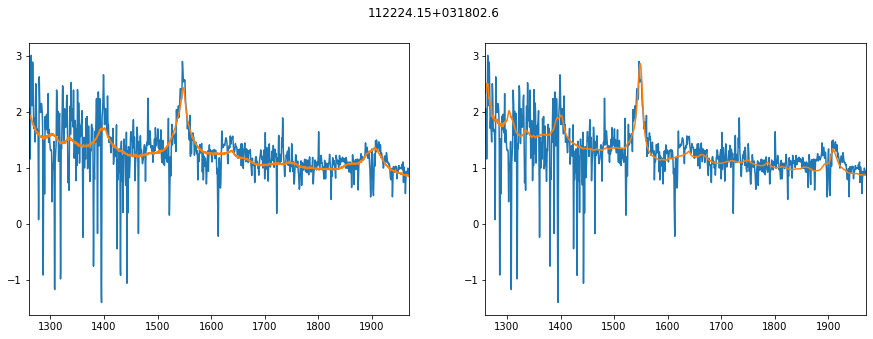

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


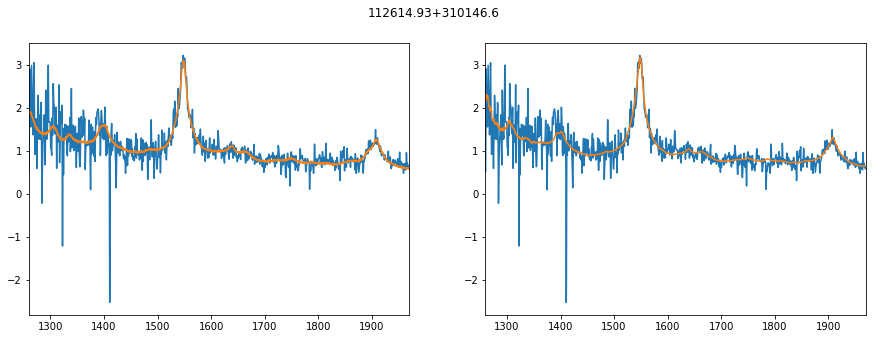

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


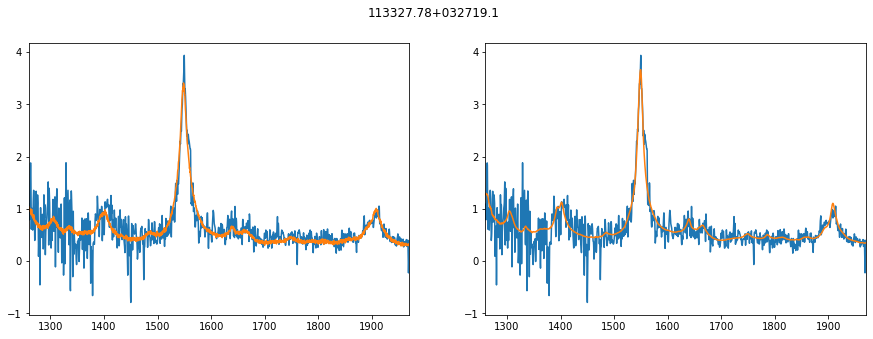

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


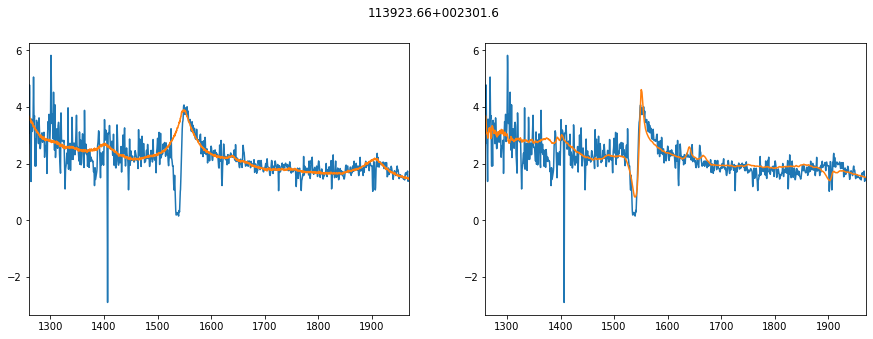

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


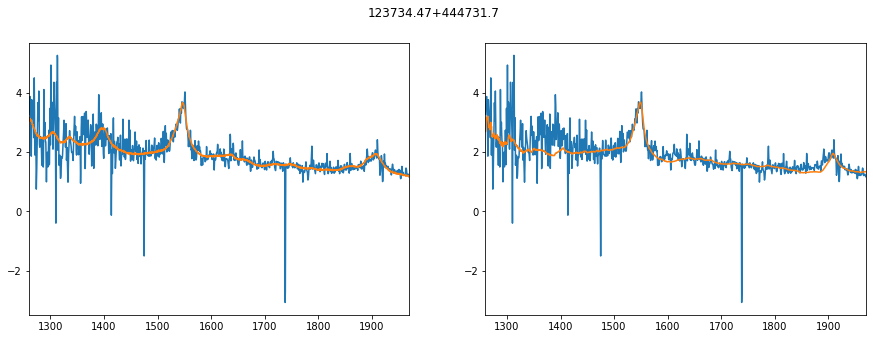

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


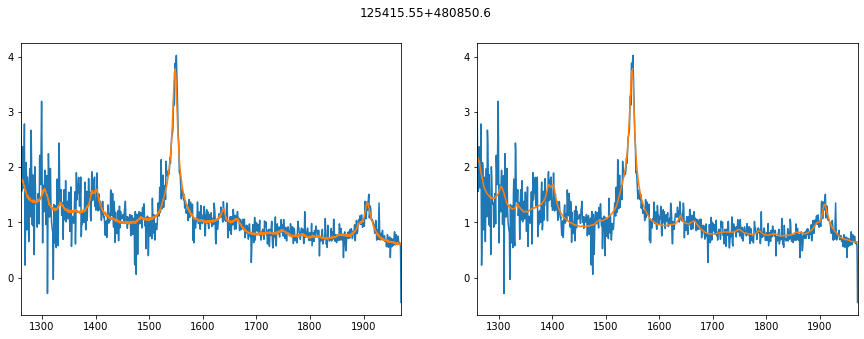

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


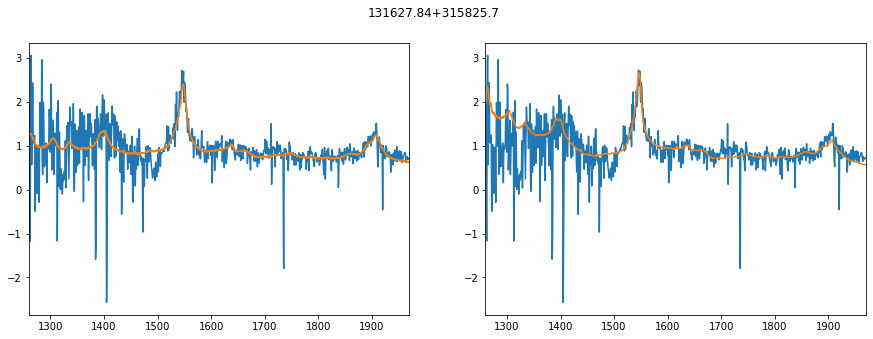

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


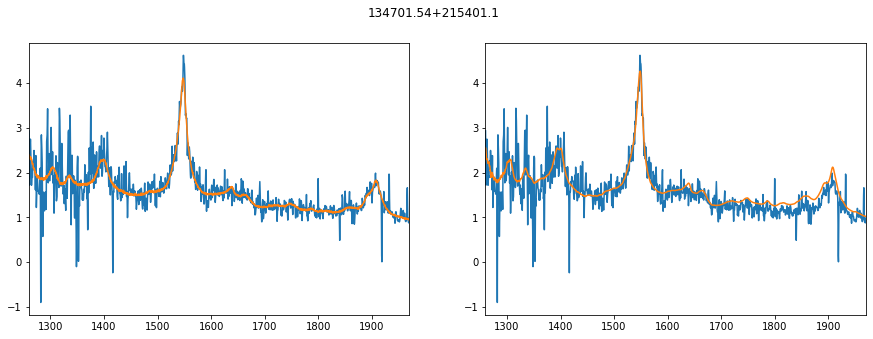

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


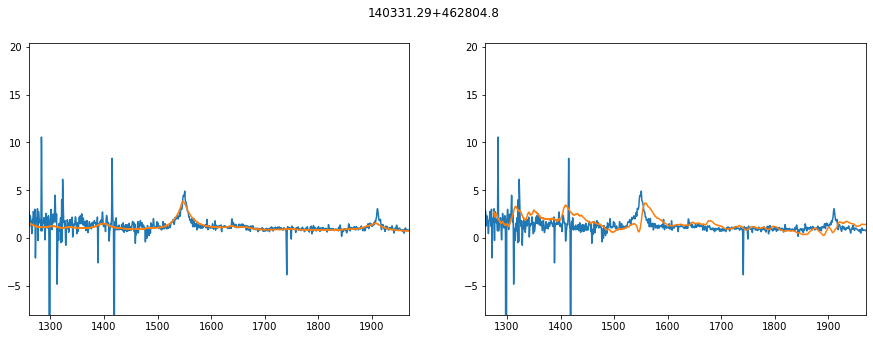

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


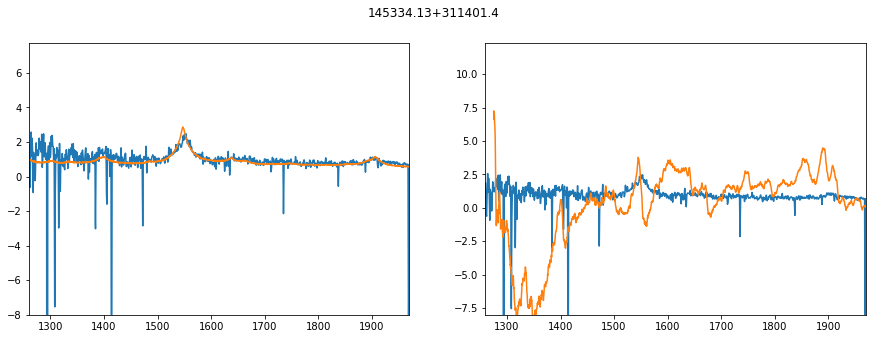

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


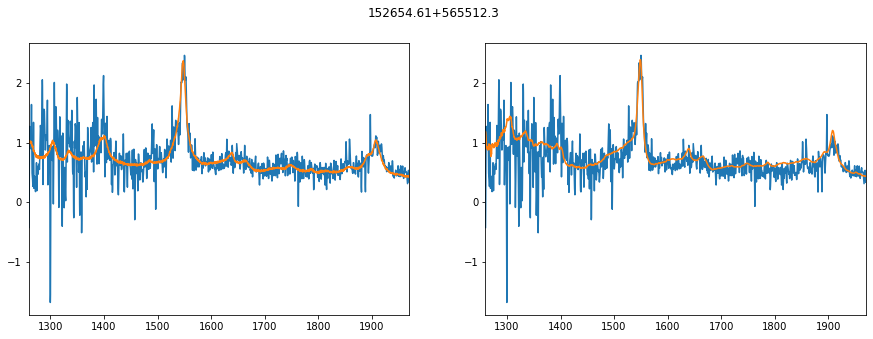

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


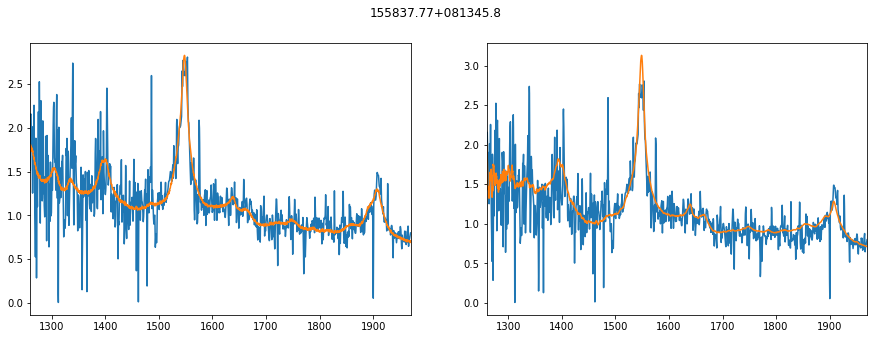

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


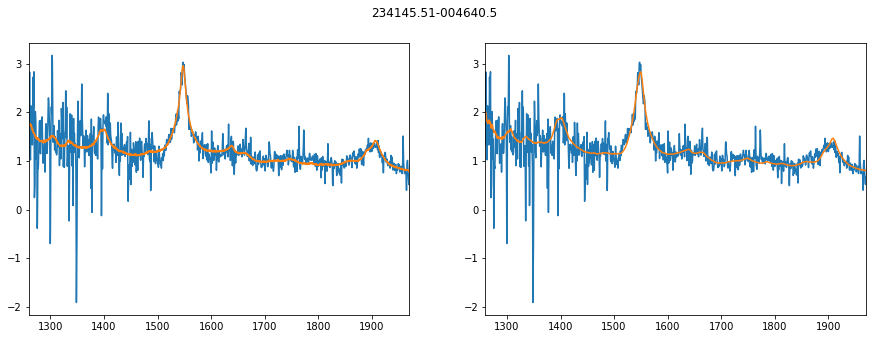

In [101]:
for i in range(len(hst)):
    #reconst = stacked_ae.predict(np.array([X_valid[i]]))
    if not np.isnan(hst_reconst[i]).any():
        fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(15,5))
        ax1.plot(wavelist[i], hst[i]*1e15)
        ax1.plot(wavelist[i], hst_reconst[i])

        ax2.plot(wavelist[i], hst[i]*1e15)
        ICAx, ICAy = bestICA(i)
        ax2.plot(ICAx, ICAy)

        ax1.set_ylim(max(ax1.get_ylim()[0], -8), ax1.get_ylim()[1])
        ax1.set_xlim(1260,1970)
        ax2.set_ylim(max(ax2.get_ylim()[0], -8), ax2.get_ylim()[1])
        ax2.set_xlim(1260,1970)
        plt.suptitle(dat["Identifier"][i])
        plt.show()

In [102]:
bestICA(0)

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


(array([1260.0855, 1260.3756, 1260.6659, ..., 2998.472 , 2999.1625,
        2999.8532]),
 array([1.85562311, 1.85342267, 1.87747444, ..., 0.50980153, 0.50569646,
        0.50825293]))

The autoencoder still "struggles" with BALs.  I think that can be (at least partially) fixed by just training on non-BALs (as Paul did to obtain the ICA components).  ``autoencoder2.ipynb`` shows that at least 1 latent parameter actually focuses on capturing BAL trough information.  Note that implementing masking isn't straightforward since there may always be different pixels that we want to mask, and we can't(?) simply turn different input neurons off and expect the encoder to do as good a job.  (Maybe this is possible, since there's a commonly used "Dropout" method that randomly ignores certain neurons.)

UPDATE: I added a mask at 1490-1546Å for CIV absorption.  It definitely helps reconstructing BALs.  Still not clear how to change the mask for each object.  Basically want to pass a mask array along with the spectra to ``stacked_ae.predict()``.

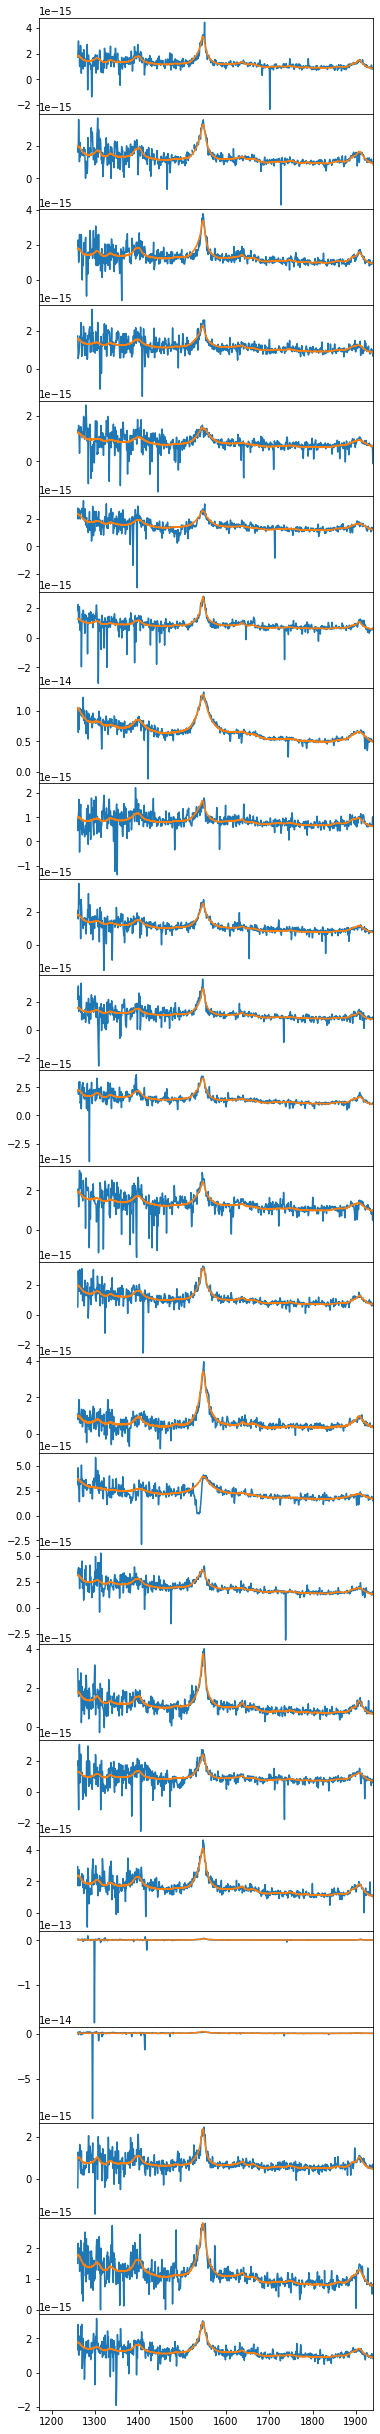

In [103]:
fig, axs = plt.subplots(len(hst), 1, figsize=(6,44), sharex=True)
plt.subplots_adjust(hspace=0)
for i in range(len(hst)):
    axs[i].plot(wavelist[i], hst[i])
    axs[i].plot(wavelist[i], hst_reconst[i]*1e-15)
    #axs[i].plot([1549,1549], [-5,5], "--k")
    #axs[i].set_ylim(max(axs[i].get_ylim()[0], -8), axs[i].get_ylim()[1])
    axs[i].set_xlim(1170,1940)
plt.show()

Can add Ly$\alpha$, but then CIV becomes sort of a "secondary feature" to the autoencoder and the Ly$\alpha$ absorption hurts its accuracy.  Any particular wavelength range that would be good to mask for Ly$\alpha$??

Save arrays back to files.

In [104]:
path_full = "../data/HST_SDSS_Data/"

In [105]:
for i,spec in enumerate(np.sort([f for f in os.listdir(path_full) if not f.startswith(".")])):
    print(spec[:30])

SDSSJ002019.22-110609.2HSTSDSS
SDSSJ082024.21+233450.4HSTSDSS
SDSSJ082658.85+061142.6HSTSDSS
SDSSJ083332.92+164411.0HSTSDSS
SDSSJ083510.36+035901.1HSTSDSS
SDSSJ085116.14+424328.8HSTSDSS
SDSSJ091451.42+421957.0HSTSDSS
SDSSJ093502.52+433110.6HSTSDSS
SDSSJ100054.96+262242.4HSTSDSS
SDSSJ103320.65+274024.2HSTSDSS
SDSSJ111138.66+575030.0HSTSDSS
SDSSJ111941.12+595108.7HSTSDSS
SDSSJ112224.15+031802.6HSTSDSS
SDSSJ112614.93+310146.6HSTSDSS
SDSSJ113327.78+032719.1HSTSDSS
SDSSJ113923.66+002301.6HSTSDSS
SDSSJ123734.47+444731.7HSTSDSS
SDSSJ125415.55+480850.6HSTSDSS
SDSSJ131627.84+315825.7HSTSDSS
SDSSJ134701.54+215401.1HSTSDSS
SDSSJ140331.29+462804.8HSTSDSS
SDSSJ145334.13+311401.4HSTSDSS
SDSSJ152654.61+565512.3HSTSDSS
SDSSJ155837.77+081345.8HSTSDSS
SDSSJ234145.51-004640.5HSTSDSS


In [113]:
def same_length(var, longvar):
    #append nans to the end of var to give it the same length as longvar
    return np.array(list(var) + [np.nan]*(len(longvar)-len(var)))

In [116]:
for i,spec in enumerate(np.sort([f for f in os.listdir(path_full) if not f.startswith(".")])):
    hdul_spec = fits.open(path_full+spec)
    
    flux   = hdul_spec[1].data["Flux"]
    wav   = hdul_spec[1].data["Wavelength"] 
    err    = hdul_spec[1].data["Flux Errors"]
    specmask   = hdul_spec[1].data["Masks"]
    
    AE = hst_reconst[i]*1e-15
    ICAx, ICAy = bestICA(i)
    
    t = Table([wav, flux, err, specmask, same_length(AE, flux), same_length(ICAy*1e-15, flux)], \
              names=('Wavelength', 'Flux', 'Flux Errors', 'Masks', 'AE_UV', 'ICA_UV'))
    t.write('../data/HST_Reconstructions_sudo/'+spec[:30]+'_wreconsts.fits', format='fits')
    #hdul.flush()
    hdul_spec.close()

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


In [117]:
hduspec = fits.open('../data/HST_Reconstructions_sudo/'+spec[:30]+'_wreconsts.fits')

In [118]:
hduspec

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1a9305d1d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1a88e48d30>]

(1260.0, 1970.0)

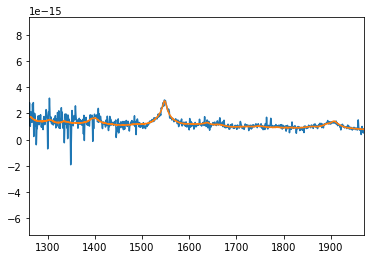

In [119]:
z = dat["Best_z"][dat["Identifier"]==spec[5:23]].values
w = hduspec[1].data["Wavelength"] / (1+z)
f = hduspec[1].data["Flux"]
r1 = hduspec[1].data["AE_UV"]
plt.plot(w,f)
plt.plot(w[(w>1260)&(w<1970)],r1[~np.isnan(r1)])
plt.xlim(1260,1970)

Good.

In [81]:
hduspec[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   48 / length of dimension 1                          
NAXIS2  =                 7432 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    6 / number of table fields                         
TTYPE1  = 'WAVE    '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'FLUX    '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'ERROR   '        

In [82]:
np.array(list(AE) + [np.nan]*(len(flux)-len(AE)))

array([1.77580023e-15, 1.77224174e-15, 1.79146367e-15, ...,
                  nan,            nan,            nan])

In [83]:
same_length(AE, ICAy)[-1900:]

array([9.13286911e-16, 9.04498415e-16, 8.90775634e-16, ...,
                  nan,            nan,            nan])

In [84]:
np.array(list(AE) + [np.nan]*5)[-7:]

array([8.14634202e-16, 7.91511049e-16,            nan,            nan,
                  nan,            nan,            nan])

In [85]:
np.nan

nan